In [1]:
import os
import sys
import torch
import random
import imageio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

parent_dir = os.path.dirname(os.path.dirname(os.path.realpath("__file__")))
sys.path.insert(0, parent_dir)

from face_lib.datasets import IJBDataset, IJBCTest
from face_lib.utils import cfg
from face_lib.utils.feature_extractors import extract_features_head
from face_lib import models as mlib, utils
from face_lib.utils.imageprocessing import preprocess
from face_lib.utils.utils import harmonic_mean

In [2]:
device_id = 0

config_path = "../configs/models/iresnet_ms1m_probface.yaml"
checkpoint_path = "/gpfs/gpfs0/r.zainulin/sota.pth"
dataset_path = "/gpfs/gpfs0/k.fedyanin/space/IJB/aligned_data_for_fusion/big"
protocol_path = "/gpfs/gpfs0/k.fedyanin/space/IJB/IJB-C/protocols/archive"
batch_size=64

In [3]:
device = torch.device("cuda:" + str(device_id))

model_args = cfg.load_config(config_path)
backbone = mlib.model_dict[model_args.backbone["name"]](
    **utils.pop_element(model_args.backbone, "name")
)
head = mlib.heads[model_args.head.name](
    **utils.pop_element(model_args.head, "name")
)

checkpoint = torch.load(checkpoint_path, map_location=device)
backbone.load_state_dict(checkpoint["backbone"])
head.load_state_dict(checkpoint["head"])

backbone, head = backbone.eval().to(device), head.eval().to(device)

In [4]:
testset = IJBDataset(dataset_path)
tester = IJBCTest(testset["abspath"].values)
tester.init_proto(protocol_path)

Number of identities :  3529
31316978 templates are initialized.


In [5]:
proc_func = lambda images: preprocess(images, [112, 112], is_training=False)

In [6]:
mu, sigma_sq = extract_features_head(
    backbone,
    head,
    tester.image_paths,
    batch_size,
    proc_func=proc_func,
    verbose=True,
    device=device,
)

  0%|          | 0/2082 [00:00<?, ?it/s]

  0%|          | 1/2082 [00:00<27:55,  1.24it/s]

  0%|          | 3/2082 [00:01<12:03,  2.87it/s]

  0%|          | 4/2082 [00:01<11:18,  3.06it/s]

  0%|          | 5/2082 [00:01<10:37,  3.26it/s]

  0%|          | 6/2082 [00:02<10:50,  3.19it/s]

  0%|          | 7/2082 [00:02<10:53,  3.17it/s]

  0%|          | 8/2082 [00:02<10:45,  3.21it/s]

  0%|          | 9/2082 [00:03<11:02,  3.13it/s]

  0%|          | 10/2082 [00:03<10:43,  3.22it/s]

  1%|          | 11/2082 [00:03<11:48,  2.92it/s]

  1%|          | 12/2082 [00:04<11:41,  2.95it/s]

  1%|          | 13/2082 [00:04<11:17,  3.05it/s]

  1%|          | 14/2082 [00:04<11:02,  3.12it/s]

  1%|          | 15/2082 [00:05<11:28,  3.00it/s]

  1%|          | 16/2082 [00:05<11:30,  2.99it/s]

  1%|          | 17/2082 [00:05<11:48,  2.91it/s]

  1%|          | 18/2082 [00:06<12:13,  2.82it/s]

  1%|          | 19/2082 [00:06<11:48,  2.91it/s]

  1%|          | 20/2082 [00:06<12:46,  2.69it/s]

  1%|          | 21/2082 [00:07<12:32,  2.74it/s]

  1%|          | 22/2082 [00:07<12:13,  2.81it/s]

  1%|          | 23/2082 [00:07<11:59,  2.86it/s]

  1%|          | 24/2082 [00:08<11:00,  3.11it/s]

  1%|          | 25/2082 [00:08<10:31,  3.26it/s]

  1%|          | 26/2082 [00:08<10:02,  3.41it/s]

  1%|▏         | 27/2082 [00:09<11:00,  3.11it/s]

  1%|▏         | 28/2082 [00:09<12:16,  2.79it/s]

  1%|▏         | 29/2082 [00:09<12:19,  2.78it/s]

  1%|▏         | 30/2082 [00:10<11:54,  2.87it/s]

  1%|▏         | 31/2082 [00:10<11:37,  2.94it/s]

  2%|▏         | 32/2082 [00:10<10:55,  3.13it/s]

  2%|▏         | 33/2082 [00:11<10:59,  3.11it/s]

  2%|▏         | 34/2082 [00:11<10:44,  3.18it/s]

  2%|▏         | 35/2082 [00:11<11:32,  2.96it/s]

  2%|▏         | 36/2082 [00:12<11:52,  2.87it/s]

  2%|▏         | 37/2082 [00:12<11:04,  3.08it/s]

  2%|▏         | 38/2082 [00:12<11:35,  2.94it/s]

  2%|▏         | 39/2082 [00:13<10:37,  3.20it/s]

  2%|▏         | 40/2082 [00:13<10:24,  3.27it/s]

  2%|▏         | 41/2082 [00:13<10:26,  3.26it/s]

  2%|▏         | 42/2082 [00:14<11:10,  3.04it/s]

  2%|▏         | 43/2082 [00:14<11:13,  3.03it/s]

  2%|▏         | 44/2082 [00:14<11:13,  3.02it/s]

  2%|▏         | 45/2082 [00:15<10:51,  3.13it/s]

  2%|▏         | 46/2082 [00:15<11:05,  3.06it/s]

  2%|▏         | 47/2082 [00:15<10:17,  3.29it/s]

  2%|▏         | 48/2082 [00:16<11:01,  3.08it/s]

  2%|▏         | 49/2082 [00:16<10:43,  3.16it/s]

  2%|▏         | 50/2082 [00:16<10:39,  3.18it/s]

  2%|▏         | 51/2082 [00:17<11:02,  3.07it/s]

  2%|▏         | 52/2082 [00:17<10:54,  3.10it/s]

  3%|▎         | 53/2082 [00:17<10:21,  3.27it/s]

  3%|▎         | 54/2082 [00:17<11:14,  3.01it/s]

  3%|▎         | 55/2082 [00:18<11:50,  2.85it/s]

  3%|▎         | 56/2082 [00:18<11:32,  2.92it/s]

  3%|▎         | 57/2082 [00:18<10:48,  3.12it/s]

  3%|▎         | 58/2082 [00:19<10:50,  3.11it/s]

  3%|▎         | 59/2082 [00:19<10:24,  3.24it/s]

  3%|▎         | 60/2082 [00:19<09:44,  3.46it/s]

  3%|▎         | 61/2082 [00:20<10:08,  3.32it/s]

  3%|▎         | 62/2082 [00:20<10:26,  3.22it/s]

  3%|▎         | 63/2082 [00:20<10:58,  3.07it/s]

  3%|▎         | 64/2082 [00:21<11:04,  3.04it/s]

  3%|▎         | 65/2082 [00:21<10:43,  3.13it/s]

  3%|▎         | 66/2082 [00:21<10:06,  3.33it/s]

  3%|▎         | 67/2082 [00:22<10:13,  3.28it/s]

  3%|▎         | 68/2082 [00:22<10:40,  3.15it/s]

  3%|▎         | 69/2082 [00:22<10:55,  3.07it/s]

  3%|▎         | 70/2082 [00:23<10:39,  3.15it/s]

  3%|▎         | 71/2082 [00:23<11:23,  2.94it/s]

  3%|▎         | 72/2082 [00:23<10:58,  3.05it/s]

  4%|▎         | 73/2082 [00:23<10:16,  3.26it/s]

  4%|▎         | 74/2082 [00:24<11:23,  2.94it/s]

  4%|▎         | 75/2082 [00:24<10:47,  3.10it/s]

  4%|▎         | 76/2082 [00:25<10:58,  3.05it/s]

  4%|▎         | 77/2082 [00:25<10:31,  3.17it/s]

  4%|▎         | 78/2082 [00:25<10:46,  3.10it/s]

  4%|▍         | 79/2082 [00:25<10:57,  3.04it/s]

  4%|▍         | 80/2082 [00:26<10:53,  3.06it/s]

  4%|▍         | 81/2082 [00:26<10:38,  3.13it/s]

  4%|▍         | 82/2082 [00:27<11:21,  2.93it/s]

  4%|▍         | 83/2082 [00:27<11:03,  3.01it/s]

  4%|▍         | 84/2082 [00:27<10:23,  3.20it/s]

  4%|▍         | 85/2082 [00:27<10:52,  3.06it/s]

  4%|▍         | 86/2082 [00:28<10:40,  3.12it/s]

  4%|▍         | 87/2082 [00:28<10:38,  3.12it/s]

  4%|▍         | 88/2082 [00:28<10:28,  3.17it/s]

  4%|▍         | 90/2082 [00:29<09:04,  3.66it/s]

  4%|▍         | 91/2082 [00:29<08:50,  3.76it/s]

  4%|▍         | 92/2082 [00:29<08:54,  3.72it/s]

  5%|▍         | 94/2082 [00:30<08:57,  3.70it/s]

  5%|▍         | 95/2082 [00:30<08:30,  3.90it/s]

  5%|▍         | 96/2082 [00:31<09:12,  3.60it/s]

  5%|▍         | 97/2082 [00:31<08:26,  3.92it/s]

  5%|▍         | 99/2082 [00:31<07:59,  4.14it/s]

  5%|▍         | 100/2082 [00:31<08:24,  3.93it/s]

  5%|▍         | 101/2082 [00:32<08:22,  3.94it/s]

  5%|▍         | 102/2082 [00:32<08:21,  3.95it/s]

  5%|▍         | 103/2082 [00:32<08:00,  4.12it/s]

  5%|▍         | 104/2082 [00:32<08:27,  3.90it/s]

  5%|▌         | 105/2082 [00:33<09:23,  3.51it/s]

  5%|▌         | 106/2082 [00:33<09:10,  3.59it/s]

  5%|▌         | 107/2082 [00:34<10:59,  3.00it/s]

  5%|▌         | 108/2082 [00:34<10:48,  3.04it/s]

  5%|▌         | 109/2082 [00:34<10:54,  3.02it/s]

  5%|▌         | 110/2082 [00:34<09:46,  3.36it/s]

  5%|▌         | 111/2082 [00:35<09:54,  3.32it/s]

  5%|▌         | 112/2082 [00:35<10:45,  3.05it/s]

  5%|▌         | 113/2082 [00:35<10:38,  3.09it/s]

  5%|▌         | 114/2082 [00:36<10:25,  3.14it/s]

  6%|▌         | 115/2082 [00:36<11:23,  2.88it/s]

  6%|▌         | 116/2082 [00:37<11:27,  2.86it/s]

  6%|▌         | 117/2082 [00:37<10:48,  3.03it/s]

  6%|▌         | 118/2082 [00:37<10:37,  3.08it/s]

  6%|▌         | 119/2082 [00:37<10:15,  3.19it/s]

  6%|▌         | 120/2082 [00:38<10:12,  3.21it/s]

  6%|▌         | 121/2082 [00:38<10:55,  2.99it/s]

  6%|▌         | 122/2082 [00:38<10:43,  3.05it/s]

  6%|▌         | 123/2082 [00:39<09:56,  3.28it/s]

  6%|▌         | 124/2082 [00:39<10:59,  2.97it/s]

  6%|▌         | 125/2082 [00:39<10:58,  2.97it/s]

  6%|▌         | 127/2082 [00:40<09:15,  3.52it/s]

  6%|▌         | 128/2082 [00:40<09:35,  3.40it/s]

  6%|▌         | 129/2082 [00:40<09:10,  3.55it/s]

  6%|▌         | 130/2082 [00:41<10:05,  3.22it/s]

  6%|▋         | 131/2082 [00:41<10:53,  2.98it/s]

  6%|▋         | 132/2082 [00:42<11:02,  2.94it/s]

  6%|▋         | 134/2082 [00:42<09:31,  3.41it/s]

  6%|▋         | 135/2082 [00:42<09:33,  3.39it/s]

  7%|▋         | 136/2082 [00:43<09:33,  3.40it/s]

  7%|▋         | 137/2082 [00:43<10:29,  3.09it/s]

  7%|▋         | 138/2082 [00:43<10:49,  2.99it/s]

  7%|▋         | 139/2082 [00:44<10:48,  3.00it/s]

  7%|▋         | 140/2082 [00:44<10:29,  3.08it/s]

  7%|▋         | 141/2082 [00:44<10:47,  3.00it/s]

  7%|▋         | 142/2082 [00:45<10:57,  2.95it/s]

  7%|▋         | 143/2082 [00:45<11:54,  2.71it/s]

  7%|▋         | 144/2082 [00:45<10:39,  3.03it/s]

  7%|▋         | 145/2082 [00:46<10:01,  3.22it/s]

  7%|▋         | 146/2082 [00:46<10:00,  3.23it/s]

  7%|▋         | 147/2082 [00:46<09:36,  3.35it/s]

  7%|▋         | 148/2082 [00:47<09:36,  3.35it/s]

  7%|▋         | 149/2082 [00:47<10:20,  3.11it/s]

  7%|▋         | 150/2082 [00:47<10:56,  2.94it/s]

  7%|▋         | 151/2082 [00:48<10:51,  2.96it/s]

  7%|▋         | 152/2082 [00:48<10:06,  3.18it/s]

  7%|▋         | 153/2082 [00:48<10:22,  3.10it/s]

  7%|▋         | 154/2082 [00:49<10:02,  3.20it/s]

  7%|▋         | 155/2082 [00:49<09:30,  3.38it/s]

  7%|▋         | 156/2082 [00:49<10:41,  3.00it/s]

  8%|▊         | 157/2082 [00:50<10:29,  3.06it/s]

  8%|▊         | 158/2082 [00:50<11:14,  2.85it/s]

  8%|▊         | 159/2082 [00:50<11:05,  2.89it/s]

  8%|▊         | 160/2082 [00:51<10:55,  2.93it/s]

  8%|▊         | 161/2082 [00:51<11:20,  2.82it/s]

  8%|▊         | 162/2082 [00:51<11:17,  2.83it/s]

  8%|▊         | 163/2082 [00:52<11:38,  2.75it/s]

  8%|▊         | 164/2082 [00:52<11:07,  2.87it/s]

  8%|▊         | 165/2082 [00:52<10:55,  2.93it/s]

  8%|▊         | 166/2082 [00:53<10:33,  3.03it/s]

  8%|▊         | 167/2082 [00:53<11:44,  2.72it/s]

  8%|▊         | 168/2082 [00:54<11:25,  2.79it/s]

  8%|▊         | 169/2082 [00:54<10:18,  3.09it/s]

  8%|▊         | 170/2082 [00:54<11:01,  2.89it/s]

  8%|▊         | 171/2082 [00:54<09:43,  3.27it/s]

  8%|▊         | 172/2082 [00:55<09:20,  3.41it/s]

  8%|▊         | 173/2082 [00:55<09:17,  3.42it/s]

  8%|▊         | 174/2082 [00:55<09:11,  3.46it/s]

  8%|▊         | 175/2082 [00:56<09:20,  3.40it/s]

  8%|▊         | 176/2082 [00:56<10:22,  3.06it/s]

  9%|▊         | 177/2082 [00:56<10:54,  2.91it/s]

  9%|▊         | 178/2082 [00:57<10:12,  3.11it/s]

  9%|▊         | 179/2082 [00:57<10:11,  3.11it/s]

  9%|▊         | 180/2082 [00:57<10:30,  3.02it/s]

  9%|▊         | 181/2082 [00:58<10:04,  3.14it/s]

  9%|▊         | 182/2082 [00:58<10:25,  3.04it/s]

  9%|▉         | 183/2082 [00:58<10:00,  3.16it/s]

  9%|▉         | 184/2082 [00:59<10:17,  3.07it/s]

  9%|▉         | 185/2082 [00:59<10:33,  2.99it/s]

  9%|▉         | 186/2082 [00:59<11:26,  2.76it/s]

  9%|▉         | 187/2082 [01:00<10:41,  2.95it/s]

  9%|▉         | 188/2082 [01:00<10:55,  2.89it/s]

  9%|▉         | 189/2082 [01:00<10:32,  2.99it/s]

  9%|▉         | 190/2082 [01:01<10:32,  2.99it/s]

  9%|▉         | 191/2082 [01:01<10:37,  2.97it/s]

  9%|▉         | 192/2082 [01:01<10:26,  3.02it/s]

  9%|▉         | 193/2082 [01:01<09:27,  3.33it/s]

  9%|▉         | 194/2082 [01:02<10:12,  3.08it/s]

  9%|▉         | 195/2082 [01:02<10:02,  3.13it/s]

  9%|▉         | 196/2082 [01:02<09:39,  3.25it/s]

  9%|▉         | 197/2082 [01:03<10:34,  2.97it/s]

 10%|▉         | 198/2082 [01:03<10:03,  3.12it/s]

 10%|▉         | 199/2082 [01:03<10:18,  3.04it/s]

 10%|▉         | 200/2082 [01:04<10:15,  3.06it/s]

 10%|▉         | 201/2082 [01:04<10:06,  3.10it/s]

 10%|▉         | 202/2082 [01:05<11:12,  2.80it/s]

 10%|▉         | 203/2082 [01:05<11:54,  2.63it/s]

 10%|▉         | 204/2082 [01:05<12:07,  2.58it/s]

 10%|▉         | 205/2082 [01:06<10:38,  2.94it/s]

 10%|▉         | 206/2082 [01:06<10:42,  2.92it/s]

 10%|▉         | 207/2082 [01:06<10:15,  3.05it/s]

 10%|▉         | 208/2082 [01:07<09:46,  3.19it/s]

 10%|█         | 209/2082 [01:07<09:58,  3.13it/s]

 10%|█         | 210/2082 [01:07<09:59,  3.12it/s]

 10%|█         | 211/2082 [01:07<09:52,  3.16it/s]

 10%|█         | 212/2082 [01:08<10:10,  3.06it/s]

 10%|█         | 213/2082 [01:08<10:16,  3.03it/s]

 10%|█         | 214/2082 [01:09<10:15,  3.03it/s]

 10%|█         | 215/2082 [01:09<10:02,  3.10it/s]

 10%|█         | 216/2082 [01:09<10:16,  3.03it/s]

 10%|█         | 217/2082 [01:09<09:24,  3.30it/s]

 10%|█         | 218/2082 [01:10<09:25,  3.29it/s]

 11%|█         | 219/2082 [01:10<09:53,  3.14it/s]

 11%|█         | 220/2082 [01:10<10:29,  2.96it/s]

 11%|█         | 221/2082 [01:11<10:41,  2.90it/s]

 11%|█         | 222/2082 [01:11<10:27,  2.96it/s]

 11%|█         | 223/2082 [01:11<10:01,  3.09it/s]

 11%|█         | 224/2082 [01:12<09:43,  3.18it/s]

 11%|█         | 225/2082 [01:12<09:25,  3.28it/s]

 11%|█         | 226/2082 [01:12<08:57,  3.45it/s]

 11%|█         | 227/2082 [01:13<08:55,  3.46it/s]

 11%|█         | 228/2082 [01:13<09:04,  3.41it/s]

 11%|█         | 229/2082 [01:13<09:46,  3.16it/s]

 11%|█         | 230/2082 [01:14<09:57,  3.10it/s]

 11%|█         | 231/2082 [01:14<09:32,  3.23it/s]

 11%|█         | 232/2082 [01:14<09:40,  3.19it/s]

 11%|█         | 233/2082 [01:14<09:34,  3.22it/s]

 11%|█         | 234/2082 [01:15<10:11,  3.02it/s]

 11%|█▏        | 235/2082 [01:15<10:15,  3.00it/s]

 11%|█▏        | 236/2082 [01:16<10:28,  2.94it/s]

 11%|█▏        | 237/2082 [01:16<10:15,  3.00it/s]

 11%|█▏        | 238/2082 [01:16<09:09,  3.36it/s]

 11%|█▏        | 239/2082 [01:16<08:59,  3.42it/s]

 12%|█▏        | 240/2082 [01:17<09:06,  3.37it/s]

 12%|█▏        | 241/2082 [01:17<08:55,  3.44it/s]

 12%|█▏        | 242/2082 [01:17<09:00,  3.40it/s]

 12%|█▏        | 243/2082 [01:17<08:44,  3.51it/s]

 12%|█▏        | 244/2082 [01:18<08:48,  3.48it/s]

 12%|█▏        | 245/2082 [01:18<09:36,  3.18it/s]

 12%|█▏        | 246/2082 [01:18<09:09,  3.34it/s]

 12%|█▏        | 247/2082 [01:19<09:41,  3.15it/s]

 12%|█▏        | 248/2082 [01:19<10:12,  3.00it/s]

 12%|█▏        | 249/2082 [01:19<09:31,  3.21it/s]

 12%|█▏        | 250/2082 [01:20<09:14,  3.31it/s]

 12%|█▏        | 251/2082 [01:20<09:35,  3.18it/s]

 12%|█▏        | 252/2082 [01:20<09:25,  3.24it/s]

 12%|█▏        | 253/2082 [01:21<10:26,  2.92it/s]

 12%|█▏        | 254/2082 [01:21<10:29,  2.90it/s]

 12%|█▏        | 255/2082 [01:21<10:47,  2.82it/s]

 12%|█▏        | 256/2082 [01:22<09:46,  3.12it/s]

 12%|█▏        | 257/2082 [01:22<09:59,  3.05it/s]

 12%|█▏        | 258/2082 [01:22<10:29,  2.90it/s]

 12%|█▏        | 259/2082 [01:23<10:04,  3.02it/s]

 12%|█▏        | 260/2082 [01:23<09:55,  3.06it/s]

 13%|█▎        | 261/2082 [01:23<09:18,  3.26it/s]

 13%|█▎        | 262/2082 [01:24<09:31,  3.19it/s]

 13%|█▎        | 263/2082 [01:24<09:14,  3.28it/s]

 13%|█▎        | 264/2082 [01:24<09:22,  3.23it/s]

 13%|█▎        | 265/2082 [01:25<09:28,  3.19it/s]

 13%|█▎        | 266/2082 [01:25<10:40,  2.83it/s]

 13%|█▎        | 267/2082 [01:25<09:57,  3.04it/s]

 13%|█▎        | 268/2082 [01:26<09:49,  3.07it/s]

 13%|█▎        | 269/2082 [01:26<09:34,  3.16it/s]

 13%|█▎        | 270/2082 [01:26<09:39,  3.13it/s]

 13%|█▎        | 271/2082 [01:27<10:06,  2.99it/s]

 13%|█▎        | 272/2082 [01:27<09:11,  3.28it/s]

 13%|█▎        | 273/2082 [01:27<08:49,  3.42it/s]

 13%|█▎        | 274/2082 [01:27<09:34,  3.15it/s]

 13%|█▎        | 275/2082 [01:28<09:11,  3.28it/s]

 13%|█▎        | 276/2082 [01:28<09:27,  3.18it/s]

 13%|█▎        | 277/2082 [01:28<09:53,  3.04it/s]

 13%|█▎        | 278/2082 [01:29<09:54,  3.04it/s]

 13%|█▎        | 279/2082 [01:29<09:59,  3.01it/s]

 13%|█▎        | 280/2082 [01:29<10:10,  2.95it/s]

 13%|█▎        | 281/2082 [01:30<10:23,  2.89it/s]

 14%|█▎        | 282/2082 [01:30<11:03,  2.71it/s]

 14%|█▎        | 283/2082 [01:31<10:52,  2.76it/s]

 14%|█▎        | 284/2082 [01:31<10:10,  2.95it/s]

 14%|█▎        | 285/2082 [01:31<09:49,  3.05it/s]

 14%|█▎        | 286/2082 [01:32<09:57,  3.01it/s]

 14%|█▍        | 287/2082 [01:32<09:49,  3.05it/s]

 14%|█▍        | 288/2082 [01:32<09:31,  3.14it/s]

 14%|█▍        | 289/2082 [01:33<10:23,  2.88it/s]

 14%|█▍        | 290/2082 [01:33<10:43,  2.79it/s]

 14%|█▍        | 291/2082 [01:33<10:26,  2.86it/s]

 14%|█▍        | 292/2082 [01:34<09:54,  3.01it/s]

 14%|█▍        | 293/2082 [01:34<10:17,  2.90it/s]

 14%|█▍        | 294/2082 [01:34<10:04,  2.96it/s]

 14%|█▍        | 295/2082 [01:35<10:13,  2.91it/s]

 14%|█▍        | 296/2082 [01:35<10:00,  2.98it/s]

 14%|█▍        | 297/2082 [01:35<09:30,  3.13it/s]

 14%|█▍        | 298/2082 [01:36<09:31,  3.12it/s]

 14%|█▍        | 299/2082 [01:36<09:24,  3.16it/s]

 14%|█▍        | 300/2082 [01:36<09:42,  3.06it/s]

 14%|█▍        | 301/2082 [01:37<09:22,  3.16it/s]

 15%|█▍        | 302/2082 [01:37<09:46,  3.04it/s]

 15%|█▍        | 303/2082 [01:37<10:04,  2.94it/s]

 15%|█▍        | 304/2082 [01:38<09:55,  2.99it/s]

 15%|█▍        | 305/2082 [01:38<09:33,  3.10it/s]

 15%|█▍        | 306/2082 [01:38<09:27,  3.13it/s]

 15%|█▍        | 307/2082 [01:39<09:55,  2.98it/s]

 15%|█▍        | 308/2082 [01:39<08:51,  3.34it/s]

 15%|█▍        | 309/2082 [01:39<08:44,  3.38it/s]

 15%|█▍        | 310/2082 [01:39<09:00,  3.28it/s]

 15%|█▍        | 311/2082 [01:40<09:21,  3.15it/s]

 15%|█▍        | 312/2082 [01:40<08:44,  3.38it/s]

 15%|█▌        | 313/2082 [01:40<08:45,  3.36it/s]

 15%|█▌        | 314/2082 [01:41<09:09,  3.22it/s]

 15%|█▌        | 315/2082 [01:41<09:13,  3.19it/s]

 15%|█▌        | 316/2082 [01:41<09:07,  3.23it/s]

 15%|█▌        | 317/2082 [01:42<09:05,  3.23it/s]

 15%|█▌        | 318/2082 [01:42<09:36,  3.06it/s]

 15%|█▌        | 319/2082 [01:42<09:29,  3.09it/s]

 15%|█▌        | 320/2082 [01:43<09:40,  3.03it/s]

 15%|█▌        | 321/2082 [01:43<10:01,  2.93it/s]

 15%|█▌        | 322/2082 [01:43<10:14,  2.86it/s]

 16%|█▌        | 323/2082 [01:44<10:36,  2.77it/s]

 16%|█▌        | 324/2082 [01:44<09:57,  2.94it/s]

 16%|█▌        | 325/2082 [01:44<10:01,  2.92it/s]

 16%|█▌        | 326/2082 [01:45<10:24,  2.81it/s]

 16%|█▌        | 327/2082 [01:45<10:25,  2.80it/s]

 16%|█▌        | 328/2082 [01:45<09:42,  3.01it/s]

 16%|█▌        | 329/2082 [01:46<09:13,  3.17it/s]

 16%|█▌        | 330/2082 [01:46<09:27,  3.09it/s]

 16%|█▌        | 331/2082 [01:46<09:04,  3.21it/s]

 16%|█▌        | 332/2082 [01:47<09:15,  3.15it/s]

 16%|█▌        | 333/2082 [01:47<09:22,  3.11it/s]

 16%|█▌        | 334/2082 [01:47<09:22,  3.11it/s]

 16%|█▌        | 335/2082 [01:47<08:45,  3.33it/s]

 16%|█▌        | 336/2082 [01:48<09:21,  3.11it/s]

 16%|█▌        | 337/2082 [01:48<09:42,  2.99it/s]

 16%|█▌        | 338/2082 [01:48<09:01,  3.22it/s]

 16%|█▋        | 339/2082 [01:49<09:26,  3.08it/s]

 16%|█▋        | 340/2082 [01:49<09:54,  2.93it/s]

 16%|█▋        | 341/2082 [01:50<10:40,  2.72it/s]

 16%|█▋        | 342/2082 [01:50<10:42,  2.71it/s]

 16%|█▋        | 343/2082 [01:50<10:03,  2.88it/s]

 17%|█▋        | 344/2082 [01:51<10:30,  2.76it/s]

 17%|█▋        | 345/2082 [01:51<10:10,  2.84it/s]

 17%|█▋        | 346/2082 [01:51<10:17,  2.81it/s]

 17%|█▋        | 347/2082 [01:52<09:50,  2.94it/s]

 17%|█▋        | 348/2082 [01:52<09:18,  3.11it/s]

 17%|█▋        | 349/2082 [01:52<09:09,  3.16it/s]

 17%|█▋        | 350/2082 [01:53<09:19,  3.10it/s]

 17%|█▋        | 351/2082 [01:53<09:29,  3.04it/s]

 17%|█▋        | 352/2082 [01:53<09:49,  2.94it/s]

 17%|█▋        | 353/2082 [01:54<09:30,  3.03it/s]

 17%|█▋        | 354/2082 [01:54<10:34,  2.72it/s]

 17%|█▋        | 355/2082 [01:54<10:03,  2.86it/s]

 17%|█▋        | 356/2082 [01:55<10:19,  2.79it/s]

 17%|█▋        | 357/2082 [01:55<09:53,  2.91it/s]

 17%|█▋        | 358/2082 [01:56<10:28,  2.74it/s]

 17%|█▋        | 359/2082 [01:56<10:22,  2.77it/s]

 17%|█▋        | 360/2082 [01:56<10:41,  2.68it/s]

 17%|█▋        | 361/2082 [01:57<10:33,  2.72it/s]

 17%|█▋        | 362/2082 [01:57<10:23,  2.76it/s]

 17%|█▋        | 363/2082 [01:57<11:26,  2.50it/s]

 17%|█▋        | 364/2082 [01:58<10:39,  2.69it/s]

 18%|█▊        | 365/2082 [01:58<10:38,  2.69it/s]

 18%|█▊        | 366/2082 [01:59<11:03,  2.59it/s]

 18%|█▊        | 367/2082 [01:59<11:25,  2.50it/s]

 18%|█▊        | 368/2082 [01:59<10:16,  2.78it/s]

 18%|█▊        | 369/2082 [02:00<09:47,  2.92it/s]

 18%|█▊        | 370/2082 [02:00<09:27,  3.02it/s]

 18%|█▊        | 371/2082 [02:00<09:09,  3.11it/s]

 18%|█▊        | 372/2082 [02:00<09:22,  3.04it/s]

 18%|█▊        | 373/2082 [02:01<08:48,  3.23it/s]

 18%|█▊        | 374/2082 [02:01<10:13,  2.79it/s]

 18%|█▊        | 375/2082 [02:02<09:56,  2.86it/s]

 18%|█▊        | 376/2082 [02:02<09:32,  2.98it/s]

 18%|█▊        | 377/2082 [02:02<09:39,  2.94it/s]

 18%|█▊        | 378/2082 [02:03<09:49,  2.89it/s]

 18%|█▊        | 379/2082 [02:03<09:27,  3.00it/s]

 18%|█▊        | 380/2082 [02:03<08:55,  3.18it/s]

 18%|█▊        | 381/2082 [02:03<09:00,  3.15it/s]

 18%|█▊        | 382/2082 [02:04<09:12,  3.08it/s]

 18%|█▊        | 383/2082 [02:04<09:50,  2.88it/s]

 18%|█▊        | 384/2082 [02:05<09:47,  2.89it/s]

 18%|█▊        | 385/2082 [02:05<09:59,  2.83it/s]

 19%|█▊        | 386/2082 [02:05<09:22,  3.02it/s]

 19%|█▊        | 387/2082 [02:06<09:10,  3.08it/s]

 19%|█▊        | 388/2082 [02:06<09:09,  3.08it/s]

 19%|█▊        | 389/2082 [02:06<08:37,  3.27it/s]

 19%|█▊        | 390/2082 [02:06<08:51,  3.18it/s]

 19%|█▉        | 391/2082 [02:07<09:08,  3.08it/s]

 19%|█▉        | 392/2082 [02:07<08:48,  3.19it/s]

 19%|█▉        | 393/2082 [02:07<08:46,  3.21it/s]

 19%|█▉        | 394/2082 [02:08<08:43,  3.23it/s]

 19%|█▉        | 395/2082 [02:08<08:48,  3.19it/s]

 19%|█▉        | 396/2082 [02:08<08:35,  3.27it/s]

 19%|█▉        | 397/2082 [02:09<09:08,  3.07it/s]

 19%|█▉        | 398/2082 [02:09<08:52,  3.17it/s]

 19%|█▉        | 399/2082 [02:09<08:50,  3.17it/s]

 19%|█▉        | 400/2082 [02:10<09:00,  3.11it/s]

 19%|█▉        | 401/2082 [02:10<10:05,  2.78it/s]

 19%|█▉        | 402/2082 [02:10<10:19,  2.71it/s]

 19%|█▉        | 403/2082 [02:11<11:54,  2.35it/s]

 19%|█▉        | 404/2082 [02:11<11:29,  2.43it/s]

 19%|█▉        | 405/2082 [02:12<11:30,  2.43it/s]

 20%|█▉        | 406/2082 [02:12<11:26,  2.44it/s]

 20%|█▉        | 407/2082 [02:13<10:52,  2.57it/s]

 20%|█▉        | 408/2082 [02:13<10:49,  2.58it/s]

 20%|█▉        | 409/2082 [02:13<11:32,  2.41it/s]

 20%|█▉        | 410/2082 [02:14<10:50,  2.57it/s]

 20%|█▉        | 411/2082 [02:14<10:03,  2.77it/s]

 20%|█▉        | 412/2082 [02:14<09:44,  2.86it/s]

 20%|█▉        | 413/2082 [02:15<09:20,  2.98it/s]

 20%|█▉        | 414/2082 [02:15<09:16,  3.00it/s]

 20%|█▉        | 415/2082 [02:15<09:21,  2.97it/s]

 20%|█▉        | 416/2082 [02:16<08:46,  3.17it/s]

 20%|██        | 417/2082 [02:16<09:55,  2.80it/s]

 20%|██        | 418/2082 [02:16<10:00,  2.77it/s]

 20%|██        | 419/2082 [02:17<09:31,  2.91it/s]

 20%|██        | 420/2082 [02:17<09:29,  2.92it/s]

 20%|██        | 421/2082 [02:17<09:39,  2.87it/s]

 20%|██        | 422/2082 [02:18<09:47,  2.83it/s]

 20%|██        | 423/2082 [02:18<09:13,  3.00it/s]

 20%|██        | 424/2082 [02:19<09:54,  2.79it/s]

 20%|██        | 425/2082 [02:19<09:29,  2.91it/s]

 20%|██        | 426/2082 [02:19<09:31,  2.90it/s]

 21%|██        | 427/2082 [02:20<10:00,  2.75it/s]

 21%|██        | 428/2082 [02:20<08:50,  3.12it/s]

 21%|██        | 429/2082 [02:20<09:00,  3.06it/s]

 21%|██        | 430/2082 [02:20<08:46,  3.14it/s]

 21%|██        | 431/2082 [02:21<09:42,  2.84it/s]

 21%|██        | 432/2082 [02:21<09:53,  2.78it/s]

 21%|██        | 433/2082 [02:22<09:52,  2.78it/s]

 21%|██        | 434/2082 [02:22<09:07,  3.01it/s]

 21%|██        | 435/2082 [02:22<09:13,  2.98it/s]

 21%|██        | 436/2082 [02:23<09:41,  2.83it/s]

 21%|██        | 437/2082 [02:23<08:58,  3.05it/s]

 21%|██        | 438/2082 [02:23<09:38,  2.84it/s]

 21%|██        | 439/2082 [02:24<09:36,  2.85it/s]

 21%|██        | 440/2082 [02:24<08:31,  3.21it/s]

 21%|██        | 441/2082 [02:24<09:19,  2.93it/s]

 21%|██        | 442/2082 [02:25<09:00,  3.03it/s]

 21%|██▏       | 443/2082 [02:25<09:12,  2.97it/s]

 21%|██▏       | 444/2082 [02:25<08:45,  3.12it/s]

 21%|██▏       | 445/2082 [02:26<09:47,  2.79it/s]

 21%|██▏       | 446/2082 [02:26<10:43,  2.54it/s]

 21%|██▏       | 447/2082 [02:26<10:28,  2.60it/s]

 22%|██▏       | 448/2082 [02:27<09:39,  2.82it/s]

 22%|██▏       | 449/2082 [02:27<09:15,  2.94it/s]

 22%|██▏       | 450/2082 [02:28<10:16,  2.65it/s]

 22%|██▏       | 451/2082 [02:28<11:30,  2.36it/s]

 22%|██▏       | 452/2082 [02:28<11:27,  2.37it/s]

 22%|██▏       | 453/2082 [02:29<11:37,  2.34it/s]

 22%|██▏       | 454/2082 [02:29<10:42,  2.53it/s]

 22%|██▏       | 455/2082 [02:30<10:33,  2.57it/s]

 22%|██▏       | 456/2082 [02:30<10:28,  2.59it/s]

 22%|██▏       | 457/2082 [02:30<10:32,  2.57it/s]

 22%|██▏       | 458/2082 [02:31<11:20,  2.39it/s]

 22%|██▏       | 459/2082 [02:31<09:54,  2.73it/s]

 22%|██▏       | 460/2082 [02:31<09:26,  2.86it/s]

 22%|██▏       | 461/2082 [02:32<08:58,  3.01it/s]

 22%|██▏       | 462/2082 [02:32<08:52,  3.04it/s]

 22%|██▏       | 463/2082 [02:32<08:21,  3.23it/s]

 22%|██▏       | 464/2082 [02:33<08:41,  3.10it/s]

 22%|██▏       | 465/2082 [02:33<09:01,  2.99it/s]

 22%|██▏       | 466/2082 [02:34<10:17,  2.62it/s]

 22%|██▏       | 467/2082 [02:34<09:46,  2.75it/s]

 22%|██▏       | 468/2082 [02:34<10:06,  2.66it/s]

 23%|██▎       | 469/2082 [02:35<09:56,  2.70it/s]

 23%|██▎       | 470/2082 [02:35<10:07,  2.65it/s]

 23%|██▎       | 471/2082 [02:35<09:48,  2.74it/s]

 23%|██▎       | 472/2082 [02:36<10:46,  2.49it/s]

 23%|██▎       | 473/2082 [02:36<10:13,  2.62it/s]

 23%|██▎       | 474/2082 [02:36<09:42,  2.76it/s]

 23%|██▎       | 475/2082 [02:37<09:26,  2.84it/s]

 23%|██▎       | 476/2082 [02:37<10:11,  2.62it/s]

 23%|██▎       | 477/2082 [02:38<09:48,  2.73it/s]

 23%|██▎       | 478/2082 [02:38<08:58,  2.98it/s]

 23%|██▎       | 479/2082 [02:38<08:35,  3.11it/s]

 23%|██▎       | 480/2082 [02:38<08:42,  3.06it/s]

 23%|██▎       | 481/2082 [02:39<08:21,  3.19it/s]

 23%|██▎       | 482/2082 [02:39<08:16,  3.22it/s]

 23%|██▎       | 483/2082 [02:39<09:09,  2.91it/s]

 23%|██▎       | 484/2082 [02:40<08:50,  3.01it/s]

 23%|██▎       | 485/2082 [02:40<09:00,  2.96it/s]

 23%|██▎       | 486/2082 [02:41<09:44,  2.73it/s]

 23%|██▎       | 487/2082 [02:41<09:56,  2.67it/s]

 23%|██▎       | 488/2082 [02:41<09:44,  2.73it/s]

 23%|██▎       | 489/2082 [02:42<09:34,  2.77it/s]

 24%|██▎       | 490/2082 [02:42<09:08,  2.90it/s]

 24%|██▎       | 491/2082 [02:42<09:11,  2.89it/s]

 24%|██▎       | 492/2082 [02:43<09:27,  2.80it/s]

 24%|██▎       | 493/2082 [02:43<09:21,  2.83it/s]

 24%|██▎       | 494/2082 [02:43<09:20,  2.83it/s]

 24%|██▍       | 495/2082 [02:44<09:48,  2.70it/s]

 24%|██▍       | 496/2082 [02:44<10:08,  2.61it/s]

 24%|██▍       | 497/2082 [02:45<09:24,  2.81it/s]

 24%|██▍       | 498/2082 [02:45<08:57,  2.95it/s]

 24%|██▍       | 499/2082 [02:45<08:59,  2.93it/s]

 24%|██▍       | 500/2082 [02:45<08:58,  2.94it/s]

 24%|██▍       | 501/2082 [02:46<09:18,  2.83it/s]

 24%|██▍       | 502/2082 [02:46<10:39,  2.47it/s]

 24%|██▍       | 503/2082 [02:47<10:19,  2.55it/s]

 24%|██▍       | 504/2082 [02:47<09:34,  2.75it/s]

 24%|██▍       | 505/2082 [02:47<09:52,  2.66it/s]

 24%|██▍       | 506/2082 [02:48<09:32,  2.75it/s]

 24%|██▍       | 507/2082 [02:48<10:25,  2.52it/s]

 24%|██▍       | 508/2082 [02:49<09:41,  2.71it/s]

 24%|██▍       | 509/2082 [02:49<09:38,  2.72it/s]

 24%|██▍       | 510/2082 [02:49<09:41,  2.71it/s]

 25%|██▍       | 511/2082 [02:50<09:44,  2.69it/s]

 25%|██▍       | 512/2082 [02:50<09:16,  2.82it/s]

 25%|██▍       | 513/2082 [02:50<10:04,  2.60it/s]

 25%|██▍       | 514/2082 [02:51<10:24,  2.51it/s]

 25%|██▍       | 515/2082 [02:51<10:49,  2.41it/s]

 25%|██▍       | 516/2082 [02:52<10:58,  2.38it/s]

 25%|██▍       | 517/2082 [02:52<10:16,  2.54it/s]

 25%|██▍       | 518/2082 [02:52<09:58,  2.61it/s]

 25%|██▍       | 519/2082 [02:53<09:35,  2.71it/s]

 25%|██▍       | 520/2082 [02:53<09:35,  2.71it/s]

 25%|██▌       | 521/2082 [02:53<08:59,  2.89it/s]

 25%|██▌       | 522/2082 [02:54<08:46,  2.96it/s]

 25%|██▌       | 523/2082 [02:54<08:30,  3.06it/s]

 25%|██▌       | 524/2082 [02:54<08:12,  3.16it/s]

 25%|██▌       | 525/2082 [02:55<08:09,  3.18it/s]

 25%|██▌       | 526/2082 [02:55<08:25,  3.08it/s]

 25%|██▌       | 527/2082 [02:55<08:32,  3.03it/s]

 25%|██▌       | 528/2082 [02:56<08:52,  2.92it/s]

 25%|██▌       | 529/2082 [02:56<09:19,  2.78it/s]

 25%|██▌       | 530/2082 [02:56<08:53,  2.91it/s]

 26%|██▌       | 531/2082 [02:57<14:11,  1.82it/s]

 26%|██▌       | 532/2082 [02:58<12:15,  2.11it/s]

 26%|██▌       | 533/2082 [02:58<11:07,  2.32it/s]

 26%|██▌       | 534/2082 [02:58<10:05,  2.56it/s]

 26%|██▌       | 535/2082 [02:59<09:59,  2.58it/s]

 26%|██▌       | 536/2082 [02:59<09:41,  2.66it/s]

 26%|██▌       | 537/2082 [03:00<09:53,  2.60it/s]

 26%|██▌       | 538/2082 [03:00<09:26,  2.72it/s]

 26%|██▌       | 539/2082 [03:00<09:25,  2.73it/s]

 26%|██▌       | 540/2082 [03:01<09:18,  2.76it/s]

 26%|██▌       | 541/2082 [03:01<09:03,  2.83it/s]

 26%|██▌       | 542/2082 [03:01<08:52,  2.89it/s]

 26%|██▌       | 543/2082 [03:02<08:50,  2.90it/s]

 26%|██▌       | 544/2082 [03:02<08:17,  3.09it/s]

 26%|██▌       | 545/2082 [03:02<07:44,  3.31it/s]

 26%|██▌       | 546/2082 [03:03<08:18,  3.08it/s]

 26%|██▋       | 547/2082 [03:03<07:50,  3.27it/s]

 26%|██▋       | 548/2082 [03:03<08:28,  3.02it/s]

 26%|██▋       | 549/2082 [03:03<08:29,  3.01it/s]

 26%|██▋       | 550/2082 [03:04<08:48,  2.90it/s]

 26%|██▋       | 551/2082 [03:04<09:06,  2.80it/s]

 27%|██▋       | 552/2082 [03:05<09:01,  2.83it/s]

 27%|██▋       | 553/2082 [03:05<08:47,  2.90it/s]

 27%|██▋       | 554/2082 [03:05<09:38,  2.64it/s]

 27%|██▋       | 555/2082 [03:06<09:33,  2.66it/s]

 27%|██▋       | 556/2082 [03:06<10:24,  2.44it/s]

 27%|██▋       | 557/2082 [03:07<10:17,  2.47it/s]

 27%|██▋       | 558/2082 [03:07<10:07,  2.51it/s]

 27%|██▋       | 559/2082 [03:07<09:14,  2.75it/s]

 27%|██▋       | 560/2082 [03:08<08:57,  2.83it/s]

 27%|██▋       | 561/2082 [03:08<08:41,  2.92it/s]

 27%|██▋       | 562/2082 [03:08<08:47,  2.88it/s]

 27%|██▋       | 563/2082 [03:09<08:14,  3.07it/s]

 27%|██▋       | 564/2082 [03:09<08:10,  3.09it/s]

 27%|██▋       | 565/2082 [03:09<08:51,  2.85it/s]

 27%|██▋       | 566/2082 [03:10<08:41,  2.91it/s]

 27%|██▋       | 567/2082 [03:10<09:05,  2.78it/s]

 27%|██▋       | 568/2082 [03:10<09:11,  2.75it/s]

 27%|██▋       | 569/2082 [03:11<08:48,  2.86it/s]

 27%|██▋       | 570/2082 [03:11<08:53,  2.83it/s]

 27%|██▋       | 571/2082 [03:11<08:17,  3.04it/s]

 27%|██▋       | 572/2082 [03:12<08:04,  3.12it/s]

 28%|██▊       | 573/2082 [03:12<08:01,  3.13it/s]

 28%|██▊       | 574/2082 [03:12<08:24,  2.99it/s]

 28%|██▊       | 575/2082 [03:13<09:25,  2.67it/s]

 28%|██▊       | 576/2082 [03:13<09:17,  2.70it/s]

 28%|██▊       | 577/2082 [03:14<09:08,  2.74it/s]

 28%|██▊       | 578/2082 [03:14<08:44,  2.86it/s]

 28%|██▊       | 579/2082 [03:14<08:45,  2.86it/s]

 28%|██▊       | 580/2082 [03:14<08:23,  2.99it/s]

 28%|██▊       | 581/2082 [03:15<08:29,  2.95it/s]

 28%|██▊       | 582/2082 [03:15<08:48,  2.84it/s]

 28%|██▊       | 583/2082 [03:16<08:16,  3.02it/s]

 28%|██▊       | 584/2082 [03:16<08:24,  2.97it/s]

 28%|██▊       | 585/2082 [03:16<09:09,  2.73it/s]

 28%|██▊       | 586/2082 [03:17<09:02,  2.76it/s]

 28%|██▊       | 587/2082 [03:17<09:06,  2.74it/s]

 28%|██▊       | 588/2082 [03:17<08:39,  2.88it/s]

 28%|██▊       | 589/2082 [03:18<07:53,  3.15it/s]

 28%|██▊       | 590/2082 [03:18<08:09,  3.05it/s]

 28%|██▊       | 591/2082 [03:18<08:09,  3.05it/s]

 28%|██▊       | 592/2082 [03:19<08:41,  2.86it/s]

 28%|██▊       | 593/2082 [03:19<09:41,  2.56it/s]

 29%|██▊       | 594/2082 [03:20<10:25,  2.38it/s]

 29%|██▊       | 595/2082 [03:20<11:16,  2.20it/s]

 29%|██▊       | 596/2082 [03:21<12:24,  2.00it/s]

 29%|██▊       | 597/2082 [03:21<11:34,  2.14it/s]

 29%|██▊       | 598/2082 [03:22<11:00,  2.25it/s]

 29%|██▉       | 599/2082 [03:22<10:18,  2.40it/s]

 29%|██▉       | 600/2082 [03:22<09:35,  2.57it/s]

 29%|██▉       | 601/2082 [03:23<08:59,  2.75it/s]

 29%|██▉       | 602/2082 [03:23<08:32,  2.89it/s]

 29%|██▉       | 603/2082 [03:23<09:02,  2.73it/s]

 29%|██▉       | 604/2082 [03:24<08:49,  2.79it/s]

 29%|██▉       | 605/2082 [03:24<08:50,  2.79it/s]

 29%|██▉       | 606/2082 [03:24<08:15,  2.98it/s]

 29%|██▉       | 607/2082 [03:25<08:31,  2.88it/s]

 29%|██▉       | 608/2082 [03:25<08:40,  2.83it/s]

 29%|██▉       | 609/2082 [03:25<08:45,  2.80it/s]

 29%|██▉       | 610/2082 [03:26<08:38,  2.84it/s]

 29%|██▉       | 611/2082 [03:26<09:57,  2.46it/s]

 29%|██▉       | 612/2082 [03:27<11:14,  2.18it/s]

 29%|██▉       | 613/2082 [03:27<11:20,  2.16it/s]

 29%|██▉       | 614/2082 [03:28<12:28,  1.96it/s]

 30%|██▉       | 615/2082 [03:28<12:52,  1.90it/s]

 30%|██▉       | 616/2082 [03:29<13:47,  1.77it/s]

 30%|██▉       | 617/2082 [03:30<14:17,  1.71it/s]

 30%|██▉       | 618/2082 [03:30<13:30,  1.81it/s]

 30%|██▉       | 619/2082 [03:31<12:20,  1.98it/s]

 30%|██▉       | 620/2082 [03:31<12:42,  1.92it/s]

 30%|██▉       | 621/2082 [03:32<13:27,  1.81it/s]

 30%|██▉       | 622/2082 [03:32<13:32,  1.80it/s]

 30%|██▉       | 623/2082 [03:33<13:45,  1.77it/s]

 30%|██▉       | 624/2082 [03:33<13:03,  1.86it/s]

 30%|███       | 625/2082 [03:34<12:41,  1.91it/s]

 30%|███       | 626/2082 [03:34<12:42,  1.91it/s]

 30%|███       | 627/2082 [03:35<12:39,  1.92it/s]

 30%|███       | 628/2082 [03:36<13:09,  1.84it/s]

 30%|███       | 629/2082 [03:36<12:28,  1.94it/s]

 30%|███       | 630/2082 [03:37<12:49,  1.89it/s]

 30%|███       | 631/2082 [03:37<12:20,  1.96it/s]

 30%|███       | 632/2082 [03:37<11:55,  2.03it/s]

 30%|███       | 633/2082 [03:38<10:54,  2.21it/s]

 30%|███       | 634/2082 [03:38<10:22,  2.33it/s]

 30%|███       | 635/2082 [03:39<10:40,  2.26it/s]

 31%|███       | 636/2082 [03:39<10:31,  2.29it/s]

 31%|███       | 637/2082 [03:39<09:54,  2.43it/s]

 31%|███       | 638/2082 [03:40<09:29,  2.54it/s]

 31%|███       | 639/2082 [03:40<08:58,  2.68it/s]

 31%|███       | 640/2082 [03:40<08:49,  2.72it/s]

 31%|███       | 641/2082 [03:41<08:52,  2.71it/s]

 31%|███       | 642/2082 [03:41<08:41,  2.76it/s]

 31%|███       | 643/2082 [03:42<09:13,  2.60it/s]

 31%|███       | 644/2082 [03:42<09:31,  2.52it/s]

 31%|███       | 645/2082 [03:42<09:32,  2.51it/s]

 31%|███       | 646/2082 [03:43<09:59,  2.39it/s]

 31%|███       | 647/2082 [03:43<09:10,  2.61it/s]

 31%|███       | 648/2082 [03:44<08:44,  2.73it/s]

 31%|███       | 649/2082 [03:44<08:24,  2.84it/s]

 31%|███       | 650/2082 [03:44<09:04,  2.63it/s]

 31%|███▏      | 651/2082 [03:45<08:37,  2.76it/s]

 31%|███▏      | 652/2082 [03:45<08:29,  2.81it/s]

 31%|███▏      | 653/2082 [03:45<08:38,  2.76it/s]

 31%|███▏      | 654/2082 [03:46<09:06,  2.61it/s]

 31%|███▏      | 655/2082 [03:46<08:26,  2.82it/s]

 32%|███▏      | 656/2082 [03:46<08:20,  2.85it/s]

 32%|███▏      | 657/2082 [03:47<08:51,  2.68it/s]

 32%|███▏      | 658/2082 [03:47<08:34,  2.77it/s]

 32%|███▏      | 659/2082 [03:48<08:31,  2.78it/s]

 32%|███▏      | 660/2082 [03:48<08:40,  2.73it/s]

 32%|███▏      | 661/2082 [03:48<08:54,  2.66it/s]

 32%|███▏      | 662/2082 [03:49<08:29,  2.79it/s]

 32%|███▏      | 663/2082 [03:49<09:17,  2.55it/s]

 32%|███▏      | 664/2082 [03:49<08:40,  2.72it/s]

 32%|███▏      | 665/2082 [03:50<08:45,  2.70it/s]

 32%|███▏      | 666/2082 [03:50<08:04,  2.92it/s]

 32%|███▏      | 667/2082 [03:50<08:19,  2.83it/s]

 32%|███▏      | 668/2082 [03:51<08:12,  2.87it/s]

 32%|███▏      | 669/2082 [03:51<07:47,  3.02it/s]

 32%|███▏      | 670/2082 [03:51<08:03,  2.92it/s]

 32%|███▏      | 671/2082 [03:52<08:22,  2.81it/s]

 32%|███▏      | 672/2082 [03:52<08:36,  2.73it/s]

 32%|███▏      | 673/2082 [03:53<08:01,  2.92it/s]

 32%|███▏      | 674/2082 [03:53<07:46,  3.02it/s]

 32%|███▏      | 675/2082 [03:53<08:03,  2.91it/s]

 32%|███▏      | 676/2082 [03:54<08:05,  2.90it/s]

 33%|███▎      | 677/2082 [03:54<07:49,  3.00it/s]

 33%|███▎      | 678/2082 [03:54<07:28,  3.13it/s]

 33%|███▎      | 679/2082 [03:54<07:19,  3.20it/s]

 33%|███▎      | 680/2082 [03:55<07:17,  3.20it/s]

 33%|███▎      | 681/2082 [03:55<07:32,  3.10it/s]

 33%|███▎      | 682/2082 [03:55<07:33,  3.09it/s]

 33%|███▎      | 683/2082 [03:56<07:46,  3.00it/s]

 33%|███▎      | 684/2082 [03:56<07:45,  3.00it/s]

 33%|███▎      | 685/2082 [03:56<07:53,  2.95it/s]

 33%|███▎      | 686/2082 [03:57<08:13,  2.83it/s]

 33%|███▎      | 687/2082 [03:57<09:02,  2.57it/s]

 33%|███▎      | 688/2082 [03:58<08:36,  2.70it/s]

 33%|███▎      | 689/2082 [03:58<09:43,  2.39it/s]

 33%|███▎      | 690/2082 [03:59<09:45,  2.38it/s]

 33%|███▎      | 691/2082 [03:59<10:24,  2.23it/s]

 33%|███▎      | 692/2082 [04:00<10:37,  2.18it/s]

 33%|███▎      | 693/2082 [04:00<10:31,  2.20it/s]

 33%|███▎      | 694/2082 [04:01<10:57,  2.11it/s]

 33%|███▎      | 695/2082 [04:01<11:47,  1.96it/s]

 33%|███▎      | 696/2082 [04:02<10:49,  2.13it/s]

 33%|███▎      | 697/2082 [04:02<10:28,  2.20it/s]

 34%|███▎      | 698/2082 [04:02<10:24,  2.22it/s]

 34%|███▎      | 699/2082 [04:03<09:34,  2.41it/s]

 34%|███▎      | 700/2082 [04:03<09:08,  2.52it/s]

 34%|███▎      | 701/2082 [04:03<08:39,  2.66it/s]

 34%|███▎      | 702/2082 [04:04<08:43,  2.64it/s]

 34%|███▍      | 703/2082 [04:04<09:55,  2.32it/s]

 34%|███▍      | 704/2082 [04:05<10:19,  2.23it/s]

 34%|███▍      | 705/2082 [04:05<10:18,  2.23it/s]

 34%|███▍      | 706/2082 [04:06<10:20,  2.22it/s]

 34%|███▍      | 707/2082 [04:06<10:12,  2.25it/s]

 34%|███▍      | 708/2082 [04:07<09:42,  2.36it/s]

 34%|███▍      | 709/2082 [04:07<09:55,  2.31it/s]

 34%|███▍      | 710/2082 [04:07<09:23,  2.43it/s]

 34%|███▍      | 711/2082 [04:08<09:22,  2.44it/s]

 34%|███▍      | 712/2082 [04:08<09:44,  2.34it/s]

 34%|███▍      | 713/2082 [04:09<10:05,  2.26it/s]

 34%|███▍      | 714/2082 [04:09<10:17,  2.21it/s]

 34%|███▍      | 715/2082 [04:10<10:30,  2.17it/s]

 34%|███▍      | 716/2082 [04:10<10:59,  2.07it/s]

 34%|███▍      | 717/2082 [04:11<12:19,  1.85it/s]

 34%|███▍      | 718/2082 [04:11<12:06,  1.88it/s]

 35%|███▍      | 719/2082 [04:12<10:11,  2.23it/s]

 35%|███▍      | 720/2082 [04:12<10:08,  2.24it/s]

 35%|███▍      | 721/2082 [04:12<09:35,  2.36it/s]

 35%|███▍      | 722/2082 [04:13<10:32,  2.15it/s]

 35%|███▍      | 723/2082 [04:13<10:35,  2.14it/s]

 35%|███▍      | 724/2082 [04:14<10:32,  2.15it/s]

 35%|███▍      | 725/2082 [04:14<10:49,  2.09it/s]

 35%|███▍      | 726/2082 [04:15<09:57,  2.27it/s]

 35%|███▍      | 727/2082 [04:16<11:38,  1.94it/s]

 35%|███▍      | 728/2082 [04:16<11:29,  1.96it/s]

 35%|███▌      | 729/2082 [04:16<11:21,  1.98it/s]

 35%|███▌      | 730/2082 [04:17<10:59,  2.05it/s]

 35%|███▌      | 731/2082 [04:17<09:51,  2.28it/s]

 35%|███▌      | 732/2082 [04:18<09:26,  2.38it/s]

 35%|███▌      | 733/2082 [04:18<10:02,  2.24it/s]

 35%|███▌      | 734/2082 [04:19<10:03,  2.23it/s]

 35%|███▌      | 735/2082 [04:19<10:14,  2.19it/s]

 35%|███▌      | 736/2082 [04:20<11:59,  1.87it/s]

 35%|███▌      | 737/2082 [04:20<11:34,  1.94it/s]

 35%|███▌      | 738/2082 [04:21<11:11,  2.00it/s]

 35%|███▌      | 739/2082 [04:21<11:04,  2.02it/s]

 36%|███▌      | 740/2082 [04:22<10:14,  2.19it/s]

 36%|███▌      | 741/2082 [04:22<09:38,  2.32it/s]

 36%|███▌      | 742/2082 [04:22<10:10,  2.19it/s]

 36%|███▌      | 743/2082 [04:23<10:42,  2.08it/s]

 36%|███▌      | 744/2082 [04:24<11:23,  1.96it/s]

 36%|███▌      | 745/2082 [04:24<10:50,  2.06it/s]

 36%|███▌      | 746/2082 [04:24<10:34,  2.10it/s]

 36%|███▌      | 747/2082 [04:25<10:32,  2.11it/s]

 36%|███▌      | 748/2082 [04:25<10:46,  2.06it/s]

 36%|███▌      | 749/2082 [04:26<10:35,  2.10it/s]

 36%|███▌      | 750/2082 [04:26<09:55,  2.24it/s]

 36%|███▌      | 751/2082 [04:27<09:45,  2.27it/s]

 36%|███▌      | 752/2082 [04:27<10:02,  2.21it/s]

 36%|███▌      | 753/2082 [04:28<09:50,  2.25it/s]

 36%|███▌      | 754/2082 [04:28<09:13,  2.40it/s]

 36%|███▋      | 755/2082 [04:28<08:38,  2.56it/s]

 36%|███▋      | 756/2082 [04:29<08:59,  2.46it/s]

 36%|███▋      | 757/2082 [04:29<09:22,  2.35it/s]

 36%|███▋      | 758/2082 [04:30<09:32,  2.31it/s]

 36%|███▋      | 759/2082 [04:30<09:48,  2.25it/s]

 37%|███▋      | 760/2082 [04:31<09:57,  2.21it/s]

 37%|███▋      | 761/2082 [04:31<09:57,  2.21it/s]

 37%|███▋      | 762/2082 [04:31<08:54,  2.47it/s]

 37%|███▋      | 763/2082 [04:32<09:22,  2.34it/s]

 37%|███▋      | 764/2082 [04:32<09:38,  2.28it/s]

 37%|███▋      | 765/2082 [04:33<08:58,  2.45it/s]

 37%|███▋      | 766/2082 [04:33<08:17,  2.65it/s]

 37%|███▋      | 767/2082 [04:33<07:53,  2.78it/s]

 37%|███▋      | 768/2082 [04:34<07:40,  2.86it/s]

 37%|███▋      | 769/2082 [04:34<07:44,  2.83it/s]

 37%|███▋      | 770/2082 [04:34<07:25,  2.94it/s]

 37%|███▋      | 771/2082 [04:35<07:01,  3.11it/s]

 37%|███▋      | 772/2082 [04:35<07:02,  3.10it/s]

 37%|███▋      | 773/2082 [04:35<07:06,  3.07it/s]

 37%|███▋      | 774/2082 [04:36<07:01,  3.11it/s]

 37%|███▋      | 775/2082 [04:36<07:13,  3.02it/s]

 37%|███▋      | 776/2082 [04:36<07:22,  2.95it/s]

 37%|███▋      | 777/2082 [04:36<06:59,  3.11it/s]

 37%|███▋      | 778/2082 [04:37<07:19,  2.97it/s]

 37%|███▋      | 779/2082 [04:37<06:46,  3.21it/s]

 37%|███▋      | 780/2082 [04:37<07:08,  3.04it/s]

 38%|███▊      | 781/2082 [04:38<06:55,  3.13it/s]

 38%|███▊      | 782/2082 [04:38<07:00,  3.10it/s]

 38%|███▊      | 783/2082 [04:38<07:09,  3.03it/s]

 38%|███▊      | 784/2082 [04:39<06:57,  3.11it/s]

 38%|███▊      | 785/2082 [04:39<07:12,  3.00it/s]

 38%|███▊      | 786/2082 [04:39<07:05,  3.04it/s]

 38%|███▊      | 787/2082 [04:40<07:05,  3.04it/s]

 38%|███▊      | 788/2082 [04:40<07:09,  3.01it/s]

 38%|███▊      | 789/2082 [04:40<07:05,  3.04it/s]

 38%|███▊      | 790/2082 [04:41<07:12,  2.99it/s]

 38%|███▊      | 791/2082 [04:41<07:09,  3.00it/s]

 38%|███▊      | 792/2082 [04:41<07:26,  2.89it/s]

 38%|███▊      | 793/2082 [04:42<07:38,  2.81it/s]

 38%|███▊      | 794/2082 [04:42<07:33,  2.84it/s]

 38%|███▊      | 795/2082 [04:43<07:53,  2.72it/s]

 38%|███▊      | 796/2082 [04:43<07:46,  2.76it/s]

 38%|███▊      | 797/2082 [04:43<07:50,  2.73it/s]

 38%|███▊      | 798/2082 [04:44<08:00,  2.67it/s]

 38%|███▊      | 799/2082 [04:44<07:52,  2.71it/s]

 38%|███▊      | 800/2082 [04:44<07:51,  2.72it/s]

 38%|███▊      | 801/2082 [04:45<07:45,  2.75it/s]

 39%|███▊      | 802/2082 [04:45<07:28,  2.86it/s]

 39%|███▊      | 803/2082 [04:46<07:59,  2.67it/s]

 39%|███▊      | 804/2082 [04:46<07:52,  2.71it/s]

 39%|███▊      | 805/2082 [04:46<07:26,  2.86it/s]

 39%|███▊      | 806/2082 [04:47<07:23,  2.88it/s]

 39%|███▉      | 807/2082 [04:47<07:06,  2.99it/s]

 39%|███▉      | 808/2082 [04:47<07:08,  2.97it/s]

 39%|███▉      | 809/2082 [04:48<06:59,  3.03it/s]

 39%|███▉      | 810/2082 [04:48<07:23,  2.87it/s]

 39%|███▉      | 811/2082 [04:48<08:17,  2.56it/s]

 39%|███▉      | 812/2082 [04:49<08:00,  2.64it/s]

 39%|███▉      | 813/2082 [04:49<07:35,  2.79it/s]

 39%|███▉      | 814/2082 [04:49<07:47,  2.71it/s]

 39%|███▉      | 815/2082 [04:50<07:53,  2.67it/s]

 39%|███▉      | 816/2082 [04:50<07:20,  2.87it/s]

 39%|███▉      | 817/2082 [04:50<07:00,  3.01it/s]

 39%|███▉      | 818/2082 [04:51<07:08,  2.95it/s]

 39%|███▉      | 819/2082 [04:51<07:07,  2.95it/s]

 39%|███▉      | 820/2082 [04:51<07:17,  2.89it/s]

 39%|███▉      | 821/2082 [04:52<07:09,  2.94it/s]

 39%|███▉      | 822/2082 [04:52<07:06,  2.96it/s]

 40%|███▉      | 823/2082 [04:53<07:38,  2.75it/s]

 40%|███▉      | 824/2082 [04:53<07:35,  2.76it/s]

 40%|███▉      | 825/2082 [04:53<07:32,  2.78it/s]

 40%|███▉      | 826/2082 [04:54<07:46,  2.69it/s]

 40%|███▉      | 827/2082 [04:54<07:37,  2.74it/s]

 40%|███▉      | 828/2082 [04:54<07:05,  2.95it/s]

 40%|███▉      | 829/2082 [04:55<07:08,  2.93it/s]

 40%|███▉      | 830/2082 [04:55<07:05,  2.95it/s]

 40%|███▉      | 831/2082 [04:55<07:33,  2.76it/s]

 40%|███▉      | 832/2082 [04:56<07:58,  2.61it/s]

 40%|████      | 833/2082 [04:56<07:36,  2.74it/s]

 40%|████      | 834/2082 [04:56<07:08,  2.92it/s]

 40%|████      | 835/2082 [04:57<07:05,  2.93it/s]

 40%|████      | 836/2082 [04:57<07:21,  2.82it/s]

 40%|████      | 837/2082 [04:58<07:47,  2.66it/s]

 40%|████      | 838/2082 [04:58<07:32,  2.75it/s]

 40%|████      | 839/2082 [04:58<07:50,  2.64it/s]

 40%|████      | 840/2082 [04:59<07:43,  2.68it/s]

 40%|████      | 841/2082 [04:59<07:36,  2.72it/s]

 40%|████      | 842/2082 [04:59<07:03,  2.93it/s]

 40%|████      | 843/2082 [05:00<07:15,  2.85it/s]

 41%|████      | 844/2082 [05:00<06:58,  2.96it/s]

 41%|████      | 845/2082 [05:00<07:46,  2.65it/s]

 41%|████      | 846/2082 [05:01<07:07,  2.89it/s]

 41%|████      | 847/2082 [05:01<06:55,  2.97it/s]

 41%|████      | 848/2082 [05:01<06:59,  2.94it/s]

 41%|████      | 849/2082 [05:02<06:50,  3.00it/s]

 41%|████      | 850/2082 [05:02<06:47,  3.02it/s]

 41%|████      | 851/2082 [05:03<07:32,  2.72it/s]

 41%|████      | 852/2082 [05:03<07:07,  2.87it/s]

 41%|████      | 853/2082 [05:03<07:00,  2.92it/s]

 41%|████      | 854/2082 [05:03<06:50,  2.99it/s]

 41%|████      | 855/2082 [05:04<07:01,  2.91it/s]

 41%|████      | 856/2082 [05:04<06:55,  2.95it/s]

 41%|████      | 857/2082 [05:04<06:54,  2.95it/s]

 41%|████      | 858/2082 [05:05<07:00,  2.91it/s]

 41%|████▏     | 859/2082 [05:05<06:55,  2.94it/s]

 41%|████▏     | 860/2082 [05:05<06:36,  3.08it/s]

 41%|████▏     | 861/2082 [05:06<06:29,  3.13it/s]

 41%|████▏     | 862/2082 [05:06<06:35,  3.08it/s]

 41%|████▏     | 863/2082 [05:06<06:26,  3.15it/s]

 41%|████▏     | 864/2082 [05:07<06:28,  3.14it/s]

 42%|████▏     | 865/2082 [05:07<06:09,  3.29it/s]

 42%|████▏     | 866/2082 [05:07<06:11,  3.27it/s]

 42%|████▏     | 867/2082 [05:08<06:42,  3.01it/s]

 42%|████▏     | 868/2082 [05:08<06:19,  3.20it/s]

 42%|████▏     | 869/2082 [05:08<06:15,  3.23it/s]

 42%|████▏     | 870/2082 [05:09<06:11,  3.27it/s]

 42%|████▏     | 871/2082 [05:09<06:10,  3.26it/s]

 42%|████▏     | 872/2082 [05:09<06:07,  3.29it/s]

 42%|████▏     | 873/2082 [05:10<06:33,  3.07it/s]

 42%|████▏     | 874/2082 [05:10<06:47,  2.96it/s]

 42%|████▏     | 875/2082 [05:10<06:45,  2.98it/s]

 42%|████▏     | 876/2082 [05:11<06:34,  3.06it/s]

 42%|████▏     | 877/2082 [05:11<06:13,  3.22it/s]

 42%|████▏     | 878/2082 [05:11<06:16,  3.20it/s]

 42%|████▏     | 879/2082 [05:11<06:12,  3.23it/s]

 42%|████▏     | 880/2082 [05:12<06:29,  3.09it/s]

 42%|████▏     | 881/2082 [05:12<06:24,  3.12it/s]

 42%|████▏     | 882/2082 [05:12<06:41,  2.99it/s]

 42%|████▏     | 883/2082 [05:13<06:25,  3.11it/s]

 42%|████▏     | 884/2082 [05:13<07:01,  2.84it/s]

 43%|████▎     | 885/2082 [05:14<07:00,  2.85it/s]

 43%|████▎     | 886/2082 [05:14<07:17,  2.73it/s]

 43%|████▎     | 887/2082 [05:14<07:06,  2.80it/s]

 43%|████▎     | 888/2082 [05:15<06:50,  2.91it/s]

 43%|████▎     | 889/2082 [05:15<06:34,  3.02it/s]

 43%|████▎     | 890/2082 [05:15<06:40,  2.98it/s]

 43%|████▎     | 891/2082 [05:16<07:15,  2.73it/s]

 43%|████▎     | 892/2082 [05:16<06:51,  2.89it/s]

 43%|████▎     | 893/2082 [05:16<06:38,  2.98it/s]

 43%|████▎     | 894/2082 [05:17<06:50,  2.89it/s]

 43%|████▎     | 895/2082 [05:17<06:27,  3.06it/s]

 43%|████▎     | 896/2082 [05:17<06:38,  2.98it/s]

 43%|████▎     | 897/2082 [05:18<06:22,  3.10it/s]

 43%|████▎     | 898/2082 [05:18<06:18,  3.13it/s]

 43%|████▎     | 899/2082 [05:18<06:25,  3.07it/s]

 43%|████▎     | 900/2082 [05:19<06:21,  3.10it/s]

 43%|████▎     | 901/2082 [05:19<06:15,  3.15it/s]

 43%|████▎     | 902/2082 [05:19<06:10,  3.18it/s]

 43%|████▎     | 903/2082 [05:20<06:15,  3.14it/s]

 43%|████▎     | 904/2082 [05:20<06:27,  3.04it/s]

 43%|████▎     | 905/2082 [05:20<06:26,  3.04it/s]

 44%|████▎     | 906/2082 [05:21<06:33,  2.99it/s]

 44%|████▎     | 907/2082 [05:21<06:16,  3.12it/s]

 44%|████▎     | 908/2082 [05:21<06:31,  3.00it/s]

 44%|████▎     | 909/2082 [05:22<06:44,  2.90it/s]

 44%|████▎     | 910/2082 [05:22<06:31,  2.99it/s]

 44%|████▍     | 911/2082 [05:22<06:42,  2.91it/s]

 44%|████▍     | 912/2082 [05:23<06:29,  3.00it/s]

 44%|████▍     | 913/2082 [05:23<07:03,  2.76it/s]

 44%|████▍     | 914/2082 [05:23<06:41,  2.91it/s]

 44%|████▍     | 915/2082 [05:24<06:26,  3.02it/s]

 44%|████▍     | 916/2082 [05:24<06:27,  3.01it/s]

 44%|████▍     | 917/2082 [05:24<06:35,  2.95it/s]

 44%|████▍     | 918/2082 [05:25<06:29,  2.99it/s]

 44%|████▍     | 919/2082 [05:25<06:48,  2.85it/s]

 44%|████▍     | 920/2082 [05:25<06:48,  2.85it/s]

 44%|████▍     | 921/2082 [05:26<06:31,  2.97it/s]

 44%|████▍     | 922/2082 [05:26<06:21,  3.04it/s]

 44%|████▍     | 923/2082 [05:26<06:35,  2.93it/s]

 44%|████▍     | 924/2082 [05:27<06:39,  2.90it/s]

 44%|████▍     | 925/2082 [05:27<06:58,  2.77it/s]

 44%|████▍     | 926/2082 [05:27<07:02,  2.74it/s]

 45%|████▍     | 927/2082 [05:28<07:06,  2.71it/s]

 45%|████▍     | 928/2082 [05:28<06:36,  2.91it/s]

 45%|████▍     | 929/2082 [05:28<06:08,  3.13it/s]

 45%|████▍     | 930/2082 [05:29<06:12,  3.10it/s]

 45%|████▍     | 931/2082 [05:29<06:32,  2.93it/s]

 45%|████▍     | 932/2082 [05:30<07:16,  2.63it/s]

 45%|████▍     | 933/2082 [05:30<07:22,  2.60it/s]

 45%|████▍     | 934/2082 [05:30<07:00,  2.73it/s]

 45%|████▍     | 935/2082 [05:31<07:09,  2.67it/s]

 45%|████▍     | 936/2082 [05:31<06:58,  2.74it/s]

 45%|████▌     | 937/2082 [05:31<07:00,  2.72it/s]

 45%|████▌     | 938/2082 [05:32<06:59,  2.73it/s]

 45%|████▌     | 939/2082 [05:32<06:52,  2.77it/s]

 45%|████▌     | 940/2082 [05:32<06:39,  2.86it/s]

 45%|████▌     | 941/2082 [05:33<06:37,  2.87it/s]

 45%|████▌     | 942/2082 [05:33<06:15,  3.04it/s]

 45%|████▌     | 943/2082 [05:33<06:32,  2.90it/s]

 45%|████▌     | 944/2082 [05:34<06:31,  2.91it/s]

 45%|████▌     | 945/2082 [05:34<06:34,  2.89it/s]

 45%|████▌     | 946/2082 [05:34<06:22,  2.97it/s]

 45%|████▌     | 947/2082 [05:35<06:15,  3.02it/s]

 46%|████▌     | 948/2082 [05:35<06:13,  3.03it/s]

 46%|████▌     | 949/2082 [05:35<06:11,  3.05it/s]

 46%|████▌     | 950/2082 [05:36<06:10,  3.06it/s]

 46%|████▌     | 951/2082 [05:36<06:14,  3.02it/s]

 46%|████▌     | 952/2082 [05:36<06:26,  2.92it/s]

 46%|████▌     | 953/2082 [05:37<06:41,  2.81it/s]

 46%|████▌     | 954/2082 [05:37<06:37,  2.84it/s]

 46%|████▌     | 955/2082 [05:37<06:00,  3.12it/s]

 46%|████▌     | 956/2082 [05:38<06:03,  3.10it/s]

 46%|████▌     | 957/2082 [05:38<06:06,  3.07it/s]

 46%|████▌     | 958/2082 [05:38<06:13,  3.01it/s]

 46%|████▌     | 959/2082 [05:39<06:40,  2.80it/s]

 46%|████▌     | 960/2082 [05:39<06:22,  2.93it/s]

 46%|████▌     | 961/2082 [05:40<06:37,  2.82it/s]

 46%|████▌     | 962/2082 [05:40<06:36,  2.82it/s]

 46%|████▋     | 963/2082 [05:40<07:05,  2.63it/s]

 46%|████▋     | 964/2082 [05:41<07:18,  2.55it/s]

 46%|████▋     | 965/2082 [05:41<07:03,  2.63it/s]

 46%|████▋     | 966/2082 [05:41<06:43,  2.76it/s]

 46%|████▋     | 967/2082 [05:42<06:45,  2.75it/s]

 46%|████▋     | 968/2082 [05:42<06:34,  2.83it/s]

 47%|████▋     | 969/2082 [05:42<06:28,  2.86it/s]

 47%|████▋     | 970/2082 [05:43<06:46,  2.74it/s]

 47%|████▋     | 971/2082 [05:43<06:30,  2.85it/s]

 47%|████▋     | 972/2082 [05:44<06:35,  2.80it/s]

 47%|████▋     | 973/2082 [05:44<06:15,  2.95it/s]

 47%|████▋     | 974/2082 [05:44<06:21,  2.90it/s]

 47%|████▋     | 975/2082 [05:44<06:03,  3.05it/s]

 47%|████▋     | 976/2082 [05:45<06:32,  2.82it/s]

 47%|████▋     | 977/2082 [05:45<07:07,  2.58it/s]

 47%|████▋     | 978/2082 [05:46<07:06,  2.59it/s]

 47%|████▋     | 979/2082 [05:46<06:40,  2.76it/s]

 47%|████▋     | 980/2082 [05:46<07:01,  2.62it/s]

 47%|████▋     | 981/2082 [05:47<06:32,  2.81it/s]

 47%|████▋     | 982/2082 [05:47<07:04,  2.59it/s]

 47%|████▋     | 983/2082 [05:48<06:58,  2.62it/s]

 47%|████▋     | 984/2082 [05:48<06:53,  2.66it/s]

 47%|████▋     | 985/2082 [05:48<06:52,  2.66it/s]

 47%|████▋     | 986/2082 [05:49<06:32,  2.79it/s]

 47%|████▋     | 987/2082 [05:49<06:29,  2.81it/s]

 47%|████▋     | 988/2082 [05:49<06:14,  2.92it/s]

 48%|████▊     | 989/2082 [05:50<06:05,  2.99it/s]

 48%|████▊     | 990/2082 [05:50<05:47,  3.14it/s]

 48%|████▊     | 991/2082 [05:50<05:40,  3.20it/s]

 48%|████▊     | 992/2082 [05:51<05:50,  3.11it/s]

 48%|████▊     | 993/2082 [05:51<06:19,  2.87it/s]

 48%|████▊     | 994/2082 [05:51<06:00,  3.02it/s]

 48%|████▊     | 995/2082 [05:52<06:05,  2.98it/s]

 48%|████▊     | 996/2082 [05:52<06:24,  2.82it/s]

 48%|████▊     | 997/2082 [05:52<06:31,  2.77it/s]

 48%|████▊     | 998/2082 [05:53<06:08,  2.95it/s]

 48%|████▊     | 999/2082 [05:53<06:21,  2.84it/s]

 48%|████▊     | 1000/2082 [05:53<06:14,  2.89it/s]

 48%|████▊     | 1001/2082 [05:54<06:33,  2.75it/s]

 48%|████▊     | 1002/2082 [05:54<06:34,  2.74it/s]

 48%|████▊     | 1003/2082 [05:55<06:50,  2.63it/s]

 48%|████▊     | 1004/2082 [05:55<06:40,  2.69it/s]

 48%|████▊     | 1005/2082 [05:55<06:18,  2.85it/s]

 48%|████▊     | 1006/2082 [05:56<06:46,  2.64it/s]

 48%|████▊     | 1007/2082 [05:56<06:36,  2.71it/s]

 48%|████▊     | 1008/2082 [05:56<06:32,  2.73it/s]

 48%|████▊     | 1009/2082 [05:57<06:31,  2.74it/s]

 49%|████▊     | 1010/2082 [05:57<06:19,  2.83it/s]

 49%|████▊     | 1011/2082 [05:57<06:23,  2.79it/s]

 49%|████▊     | 1012/2082 [05:58<06:11,  2.88it/s]

 49%|████▊     | 1013/2082 [05:58<06:12,  2.87it/s]

 49%|████▊     | 1014/2082 [05:58<06:21,  2.80it/s]

 49%|████▉     | 1015/2082 [05:59<06:11,  2.87it/s]

 49%|████▉     | 1016/2082 [05:59<06:05,  2.92it/s]

 49%|████▉     | 1017/2082 [05:59<05:48,  3.05it/s]

 49%|████▉     | 1018/2082 [06:00<05:40,  3.12it/s]

 49%|████▉     | 1019/2082 [06:00<05:54,  3.00it/s]

 49%|████▉     | 1020/2082 [06:01<06:22,  2.78it/s]

 49%|████▉     | 1021/2082 [06:01<07:27,  2.37it/s]

 49%|████▉     | 1022/2082 [06:01<07:06,  2.49it/s]

 49%|████▉     | 1023/2082 [06:02<06:39,  2.65it/s]

 49%|████▉     | 1024/2082 [06:02<06:58,  2.53it/s]

 49%|████▉     | 1025/2082 [06:03<07:49,  2.25it/s]

 49%|████▉     | 1026/2082 [06:03<06:51,  2.56it/s]

 49%|████▉     | 1027/2082 [06:03<06:37,  2.65it/s]

 49%|████▉     | 1028/2082 [06:04<06:18,  2.78it/s]

 49%|████▉     | 1029/2082 [06:04<06:49,  2.57it/s]

 49%|████▉     | 1030/2082 [06:05<06:44,  2.60it/s]

 50%|████▉     | 1031/2082 [06:05<06:56,  2.52it/s]

 50%|████▉     | 1032/2082 [06:05<06:49,  2.56it/s]

 50%|████▉     | 1033/2082 [06:06<06:40,  2.62it/s]

 50%|████▉     | 1034/2082 [06:06<06:06,  2.86it/s]

 50%|████▉     | 1035/2082 [06:06<05:47,  3.01it/s]

 50%|████▉     | 1036/2082 [06:07<05:37,  3.10it/s]

 50%|████▉     | 1037/2082 [06:07<05:23,  3.23it/s]

 50%|████▉     | 1038/2082 [06:07<05:40,  3.07it/s]

 50%|████▉     | 1039/2082 [06:08<06:03,  2.87it/s]

 50%|████▉     | 1040/2082 [06:08<06:07,  2.83it/s]

 50%|█████     | 1041/2082 [06:08<06:17,  2.76it/s]

 50%|█████     | 1042/2082 [06:09<06:05,  2.85it/s]

 50%|█████     | 1043/2082 [06:09<06:26,  2.69it/s]

 50%|█████     | 1044/2082 [06:10<06:36,  2.62it/s]

 50%|█████     | 1045/2082 [06:10<06:24,  2.70it/s]

 50%|█████     | 1046/2082 [06:10<06:03,  2.85it/s]

 50%|█████     | 1047/2082 [06:10<05:45,  2.99it/s]

 50%|█████     | 1048/2082 [06:11<05:55,  2.91it/s]

 50%|█████     | 1049/2082 [06:11<05:58,  2.88it/s]

 50%|█████     | 1050/2082 [06:12<06:37,  2.60it/s]

 50%|█████     | 1051/2082 [06:12<06:49,  2.52it/s]

 51%|█████     | 1052/2082 [06:12<06:24,  2.68it/s]

 51%|█████     | 1053/2082 [06:13<06:22,  2.69it/s]

 51%|█████     | 1054/2082 [06:13<06:37,  2.59it/s]

 51%|█████     | 1055/2082 [06:14<06:25,  2.66it/s]

 51%|█████     | 1056/2082 [06:14<06:18,  2.71it/s]

 51%|█████     | 1057/2082 [06:14<05:57,  2.87it/s]

 51%|█████     | 1058/2082 [06:14<05:43,  2.98it/s]

 51%|█████     | 1059/2082 [06:15<05:45,  2.96it/s]

 51%|█████     | 1060/2082 [06:15<05:52,  2.90it/s]

 51%|█████     | 1061/2082 [06:15<05:35,  3.05it/s]

 51%|█████     | 1062/2082 [06:16<05:39,  3.00it/s]

 51%|█████     | 1063/2082 [06:16<05:51,  2.90it/s]

 51%|█████     | 1064/2082 [06:17<05:47,  2.93it/s]

 51%|█████     | 1065/2082 [06:17<05:57,  2.85it/s]

 51%|█████     | 1066/2082 [06:17<06:10,  2.74it/s]

 51%|█████     | 1067/2082 [06:18<05:59,  2.82it/s]

 51%|█████▏    | 1068/2082 [06:18<05:46,  2.93it/s]

 51%|█████▏    | 1069/2082 [06:18<05:40,  2.98it/s]

 51%|█████▏    | 1070/2082 [06:19<06:09,  2.74it/s]

 51%|█████▏    | 1071/2082 [06:19<06:25,  2.62it/s]

 51%|█████▏    | 1072/2082 [06:19<06:06,  2.75it/s]

 52%|█████▏    | 1073/2082 [06:20<05:57,  2.82it/s]

 52%|█████▏    | 1074/2082 [06:20<06:20,  2.65it/s]

 52%|█████▏    | 1075/2082 [06:21<06:16,  2.68it/s]

 52%|█████▏    | 1076/2082 [06:21<06:13,  2.69it/s]

 52%|█████▏    | 1077/2082 [06:21<06:31,  2.57it/s]

 52%|█████▏    | 1078/2082 [06:22<06:18,  2.66it/s]

 52%|█████▏    | 1079/2082 [06:22<06:07,  2.73it/s]

 52%|█████▏    | 1080/2082 [06:22<05:42,  2.93it/s]

 52%|█████▏    | 1081/2082 [06:23<05:59,  2.78it/s]

 52%|█████▏    | 1082/2082 [06:23<05:55,  2.82it/s]

 52%|█████▏    | 1083/2082 [06:23<06:08,  2.71it/s]

 52%|█████▏    | 1084/2082 [06:24<06:21,  2.62it/s]

 52%|█████▏    | 1085/2082 [06:24<06:09,  2.70it/s]

 52%|█████▏    | 1086/2082 [06:25<05:47,  2.86it/s]

 52%|█████▏    | 1087/2082 [06:25<05:43,  2.89it/s]

 52%|█████▏    | 1088/2082 [06:25<05:48,  2.85it/s]

 52%|█████▏    | 1089/2082 [06:26<05:45,  2.87it/s]

 52%|█████▏    | 1090/2082 [06:26<05:55,  2.79it/s]

 52%|█████▏    | 1091/2082 [06:26<05:51,  2.82it/s]

 52%|█████▏    | 1092/2082 [06:27<06:01,  2.74it/s]

 52%|█████▏    | 1093/2082 [06:27<05:52,  2.80it/s]

 53%|█████▎    | 1094/2082 [06:27<05:59,  2.75it/s]

 53%|█████▎    | 1095/2082 [06:28<06:00,  2.74it/s]

 53%|█████▎    | 1096/2082 [06:28<05:40,  2.90it/s]

 53%|█████▎    | 1097/2082 [06:28<05:50,  2.81it/s]

 53%|█████▎    | 1098/2082 [06:29<06:14,  2.63it/s]

 53%|█████▎    | 1099/2082 [06:29<05:59,  2.74it/s]

 53%|█████▎    | 1100/2082 [06:30<05:41,  2.88it/s]

 53%|█████▎    | 1101/2082 [06:30<05:26,  3.00it/s]

 53%|█████▎    | 1102/2082 [06:30<05:52,  2.78it/s]

 53%|█████▎    | 1103/2082 [06:31<06:19,  2.58it/s]

 53%|█████▎    | 1104/2082 [06:31<05:56,  2.75it/s]

 53%|█████▎    | 1105/2082 [06:31<05:52,  2.77it/s]

 53%|█████▎    | 1106/2082 [06:32<05:51,  2.78it/s]

 53%|█████▎    | 1107/2082 [06:32<05:49,  2.79it/s]

 53%|█████▎    | 1108/2082 [06:32<05:49,  2.79it/s]

 53%|█████▎    | 1109/2082 [06:33<06:01,  2.69it/s]

 53%|█████▎    | 1110/2082 [06:33<06:04,  2.67it/s]

 53%|█████▎    | 1111/2082 [06:34<06:05,  2.66it/s]

 53%|█████▎    | 1112/2082 [06:34<06:18,  2.56it/s]

 53%|█████▎    | 1113/2082 [06:34<06:03,  2.67it/s]

 54%|█████▎    | 1114/2082 [06:35<05:45,  2.80it/s]

 54%|█████▎    | 1115/2082 [06:35<05:53,  2.74it/s]

 54%|█████▎    | 1116/2082 [06:36<06:14,  2.58it/s]

 54%|█████▎    | 1117/2082 [06:36<06:03,  2.66it/s]

 54%|█████▎    | 1118/2082 [06:36<06:01,  2.67it/s]

 54%|█████▎    | 1119/2082 [06:37<05:56,  2.70it/s]

 54%|█████▍    | 1120/2082 [06:37<05:42,  2.81it/s]

 54%|█████▍    | 1121/2082 [06:37<05:41,  2.82it/s]

 54%|█████▍    | 1122/2082 [06:38<05:53,  2.71it/s]

 54%|█████▍    | 1123/2082 [06:38<05:44,  2.78it/s]

 54%|█████▍    | 1124/2082 [06:38<05:58,  2.67it/s]

 54%|█████▍    | 1125/2082 [06:39<05:51,  2.72it/s]

 54%|█████▍    | 1126/2082 [06:39<05:55,  2.69it/s]

 54%|█████▍    | 1127/2082 [06:39<05:49,  2.74it/s]

 54%|█████▍    | 1128/2082 [06:40<05:58,  2.66it/s]

 54%|█████▍    | 1129/2082 [06:40<06:02,  2.63it/s]

 54%|█████▍    | 1130/2082 [06:41<05:50,  2.72it/s]

 54%|█████▍    | 1131/2082 [06:41<05:28,  2.90it/s]

 54%|█████▍    | 1132/2082 [06:41<05:31,  2.87it/s]

 54%|█████▍    | 1133/2082 [06:42<05:30,  2.88it/s]

 54%|█████▍    | 1134/2082 [06:42<05:09,  3.06it/s]

 55%|█████▍    | 1135/2082 [06:42<05:37,  2.81it/s]

 55%|█████▍    | 1136/2082 [06:43<05:53,  2.67it/s]

 55%|█████▍    | 1137/2082 [06:43<05:49,  2.70it/s]

 55%|█████▍    | 1138/2082 [06:43<05:41,  2.77it/s]

 55%|█████▍    | 1139/2082 [06:44<05:39,  2.78it/s]

 55%|█████▍    | 1140/2082 [06:44<05:35,  2.81it/s]

 55%|█████▍    | 1141/2082 [06:45<05:48,  2.70it/s]

 55%|█████▍    | 1142/2082 [06:45<05:32,  2.83it/s]

 55%|█████▍    | 1143/2082 [06:45<05:43,  2.73it/s]

 55%|█████▍    | 1144/2082 [06:46<05:40,  2.75it/s]

 55%|█████▍    | 1145/2082 [06:46<05:29,  2.85it/s]

 55%|█████▌    | 1146/2082 [06:46<05:38,  2.77it/s]

 55%|█████▌    | 1147/2082 [06:47<05:32,  2.81it/s]

 55%|█████▌    | 1148/2082 [06:47<05:21,  2.91it/s]

 55%|█████▌    | 1149/2082 [06:47<05:10,  3.00it/s]

 55%|█████▌    | 1150/2082 [06:48<05:25,  2.86it/s]

 55%|█████▌    | 1151/2082 [06:48<05:27,  2.84it/s]

 55%|█████▌    | 1152/2082 [06:48<05:40,  2.73it/s]

 55%|█████▌    | 1153/2082 [06:49<05:28,  2.83it/s]

 55%|█████▌    | 1154/2082 [06:49<05:13,  2.96it/s]

 55%|█████▌    | 1155/2082 [06:49<05:05,  3.03it/s]

 56%|█████▌    | 1156/2082 [06:50<05:03,  3.05it/s]

 56%|█████▌    | 1157/2082 [06:50<04:53,  3.16it/s]

 56%|█████▌    | 1158/2082 [06:50<05:06,  3.02it/s]

 56%|█████▌    | 1159/2082 [06:51<05:07,  3.00it/s]

 56%|█████▌    | 1160/2082 [06:51<04:52,  3.15it/s]

 56%|█████▌    | 1161/2082 [06:51<04:52,  3.14it/s]

 56%|█████▌    | 1162/2082 [06:52<05:04,  3.02it/s]

 56%|█████▌    | 1163/2082 [06:52<05:08,  2.98it/s]

 56%|█████▌    | 1164/2082 [06:52<05:38,  2.71it/s]

 56%|█████▌    | 1165/2082 [06:53<06:12,  2.46it/s]

 56%|█████▌    | 1166/2082 [06:53<05:54,  2.59it/s]

 56%|█████▌    | 1167/2082 [06:54<05:45,  2.65it/s]

 56%|█████▌    | 1168/2082 [06:54<05:35,  2.73it/s]

 56%|█████▌    | 1169/2082 [06:54<05:40,  2.69it/s]

 56%|█████▌    | 1170/2082 [06:55<05:35,  2.72it/s]

 56%|█████▌    | 1171/2082 [06:55<05:49,  2.61it/s]

 56%|█████▋    | 1172/2082 [06:55<05:17,  2.86it/s]

 56%|█████▋    | 1173/2082 [06:56<05:28,  2.77it/s]

 56%|█████▋    | 1174/2082 [06:56<04:52,  3.10it/s]

 56%|█████▋    | 1175/2082 [06:56<05:06,  2.96it/s]

 56%|█████▋    | 1176/2082 [06:57<04:53,  3.09it/s]

 57%|█████▋    | 1177/2082 [06:57<05:03,  2.98it/s]

 57%|█████▋    | 1178/2082 [06:57<05:18,  2.84it/s]

 57%|█████▋    | 1179/2082 [06:58<05:05,  2.95it/s]

 57%|█████▋    | 1180/2082 [06:58<05:04,  2.97it/s]

 57%|█████▋    | 1181/2082 [06:58<05:23,  2.79it/s]

 57%|█████▋    | 1182/2082 [06:59<05:07,  2.92it/s]

 57%|█████▋    | 1183/2082 [06:59<05:19,  2.81it/s]

 57%|█████▋    | 1184/2082 [07:00<05:15,  2.84it/s]

 57%|█████▋    | 1185/2082 [07:00<05:36,  2.67it/s]

 57%|█████▋    | 1186/2082 [07:00<05:25,  2.75it/s]

 57%|█████▋    | 1187/2082 [07:01<05:35,  2.67it/s]

 57%|█████▋    | 1188/2082 [07:01<05:34,  2.67it/s]

 57%|█████▋    | 1189/2082 [07:01<05:44,  2.59it/s]

 57%|█████▋    | 1190/2082 [07:02<05:51,  2.54it/s]

 57%|█████▋    | 1191/2082 [07:02<06:04,  2.45it/s]

 57%|█████▋    | 1192/2082 [07:03<06:15,  2.37it/s]

 57%|█████▋    | 1193/2082 [07:03<06:21,  2.33it/s]

 57%|█████▋    | 1194/2082 [07:04<06:28,  2.29it/s]

 57%|█████▋    | 1195/2082 [07:04<06:08,  2.41it/s]

 57%|█████▋    | 1196/2082 [07:04<05:54,  2.50it/s]

 57%|█████▋    | 1197/2082 [07:05<05:33,  2.65it/s]

 58%|█████▊    | 1198/2082 [07:05<05:30,  2.67it/s]

 58%|█████▊    | 1199/2082 [07:06<05:44,  2.56it/s]

 58%|█████▊    | 1200/2082 [07:06<05:25,  2.71it/s]

 58%|█████▊    | 1201/2082 [07:06<05:06,  2.88it/s]

 58%|█████▊    | 1202/2082 [07:07<05:13,  2.81it/s]

 58%|█████▊    | 1203/2082 [07:07<05:10,  2.84it/s]

 58%|█████▊    | 1204/2082 [07:07<05:13,  2.80it/s]

 58%|█████▊    | 1205/2082 [07:08<05:39,  2.58it/s]

 58%|█████▊    | 1206/2082 [07:08<05:10,  2.82it/s]

 58%|█████▊    | 1207/2082 [07:08<05:08,  2.84it/s]

 58%|█████▊    | 1208/2082 [07:09<05:19,  2.74it/s]

 58%|█████▊    | 1209/2082 [07:09<05:19,  2.74it/s]

 58%|█████▊    | 1210/2082 [07:09<05:04,  2.87it/s]

 58%|█████▊    | 1211/2082 [07:10<05:23,  2.69it/s]

 58%|█████▊    | 1212/2082 [07:10<05:26,  2.66it/s]

 58%|█████▊    | 1213/2082 [07:11<05:44,  2.52it/s]

 58%|█████▊    | 1214/2082 [07:11<05:31,  2.62it/s]

 58%|█████▊    | 1215/2082 [07:11<05:19,  2.72it/s]

 58%|█████▊    | 1216/2082 [07:12<05:21,  2.69it/s]

 58%|█████▊    | 1217/2082 [07:12<05:23,  2.68it/s]

 59%|█████▊    | 1218/2082 [07:13<05:39,  2.55it/s]

 59%|█████▊    | 1219/2082 [07:13<05:34,  2.58it/s]

 59%|█████▊    | 1220/2082 [07:13<05:26,  2.64it/s]

 59%|█████▊    | 1221/2082 [07:14<05:24,  2.65it/s]

 59%|█████▊    | 1222/2082 [07:14<05:29,  2.61it/s]

 59%|█████▊    | 1223/2082 [07:14<05:14,  2.73it/s]

 59%|█████▉    | 1224/2082 [07:15<05:08,  2.79it/s]

 59%|█████▉    | 1225/2082 [07:15<04:53,  2.92it/s]

 59%|█████▉    | 1226/2082 [07:15<04:56,  2.89it/s]

 59%|█████▉    | 1227/2082 [07:16<05:01,  2.84it/s]

 59%|█████▉    | 1228/2082 [07:16<05:02,  2.82it/s]

 59%|█████▉    | 1229/2082 [07:16<05:05,  2.79it/s]

 59%|█████▉    | 1230/2082 [07:17<05:33,  2.56it/s]

 59%|█████▉    | 1231/2082 [07:17<05:29,  2.58it/s]

 59%|█████▉    | 1232/2082 [07:18<05:48,  2.44it/s]

 59%|█████▉    | 1233/2082 [07:18<05:44,  2.47it/s]

 59%|█████▉    | 1234/2082 [07:18<05:21,  2.64it/s]

 59%|█████▉    | 1235/2082 [07:19<05:12,  2.71it/s]

 59%|█████▉    | 1236/2082 [07:19<05:15,  2.68it/s]

 59%|█████▉    | 1237/2082 [07:20<05:26,  2.59it/s]

 59%|█████▉    | 1238/2082 [07:20<05:22,  2.62it/s]

 60%|█████▉    | 1239/2082 [07:20<04:58,  2.82it/s]

 60%|█████▉    | 1240/2082 [07:21<05:21,  2.62it/s]

 60%|█████▉    | 1241/2082 [07:21<04:59,  2.80it/s]

 60%|█████▉    | 1242/2082 [07:21<05:11,  2.70it/s]

 60%|█████▉    | 1243/2082 [07:22<04:56,  2.83it/s]

 60%|█████▉    | 1244/2082 [07:22<05:33,  2.51it/s]

 60%|█████▉    | 1245/2082 [07:23<05:28,  2.55it/s]

 60%|█████▉    | 1246/2082 [07:23<05:28,  2.54it/s]

 60%|█████▉    | 1247/2082 [07:23<05:24,  2.57it/s]

 60%|█████▉    | 1248/2082 [07:24<05:11,  2.68it/s]

 60%|█████▉    | 1249/2082 [07:24<05:39,  2.45it/s]

 60%|██████    | 1250/2082 [07:24<05:03,  2.74it/s]

 60%|██████    | 1251/2082 [07:25<05:00,  2.77it/s]

 60%|██████    | 1252/2082 [07:25<05:14,  2.64it/s]

 60%|██████    | 1253/2082 [07:26<05:23,  2.56it/s]

 60%|██████    | 1254/2082 [07:26<05:18,  2.60it/s]

 60%|██████    | 1255/2082 [07:26<05:19,  2.59it/s]

 60%|██████    | 1256/2082 [07:27<05:21,  2.57it/s]

 60%|██████    | 1257/2082 [07:27<05:03,  2.71it/s]

 60%|██████    | 1258/2082 [07:28<05:17,  2.60it/s]

 60%|██████    | 1259/2082 [07:28<05:29,  2.50it/s]

 61%|██████    | 1260/2082 [07:28<05:20,  2.56it/s]

 61%|██████    | 1261/2082 [07:29<05:12,  2.63it/s]

 61%|██████    | 1262/2082 [07:29<05:02,  2.71it/s]

 61%|██████    | 1263/2082 [07:29<05:02,  2.70it/s]

 61%|██████    | 1264/2082 [07:30<04:57,  2.75it/s]

 61%|██████    | 1265/2082 [07:30<05:00,  2.72it/s]

 61%|██████    | 1266/2082 [07:31<05:01,  2.70it/s]

 61%|██████    | 1267/2082 [07:31<04:55,  2.75it/s]

 61%|██████    | 1268/2082 [07:31<04:59,  2.72it/s]

 61%|██████    | 1269/2082 [07:32<04:57,  2.73it/s]

 61%|██████    | 1270/2082 [07:32<04:56,  2.74it/s]

 61%|██████    | 1271/2082 [07:32<04:38,  2.91it/s]

 61%|██████    | 1272/2082 [07:33<04:37,  2.92it/s]

 61%|██████    | 1273/2082 [07:33<04:28,  3.02it/s]

 61%|██████    | 1274/2082 [07:33<04:27,  3.03it/s]

 61%|██████    | 1275/2082 [07:34<04:27,  3.02it/s]

 61%|██████▏   | 1276/2082 [07:34<04:50,  2.77it/s]

 61%|██████▏   | 1277/2082 [07:34<04:54,  2.73it/s]

 61%|██████▏   | 1278/2082 [07:35<05:04,  2.64it/s]

 61%|██████▏   | 1279/2082 [07:35<04:59,  2.68it/s]

 61%|██████▏   | 1280/2082 [07:35<04:35,  2.91it/s]

 62%|██████▏   | 1281/2082 [07:36<04:49,  2.77it/s]

 62%|██████▏   | 1282/2082 [07:36<04:45,  2.81it/s]

 62%|██████▏   | 1283/2082 [07:37<05:04,  2.62it/s]

 62%|██████▏   | 1284/2082 [07:37<04:53,  2.72it/s]

 62%|██████▏   | 1285/2082 [07:37<04:45,  2.79it/s]

 62%|██████▏   | 1286/2082 [07:38<04:47,  2.76it/s]

 62%|██████▏   | 1287/2082 [07:38<04:46,  2.77it/s]

 62%|██████▏   | 1288/2082 [07:38<04:58,  2.66it/s]

 62%|██████▏   | 1289/2082 [07:39<04:45,  2.78it/s]

 62%|██████▏   | 1290/2082 [07:39<04:45,  2.78it/s]

 62%|██████▏   | 1291/2082 [07:40<04:52,  2.70it/s]

 62%|██████▏   | 1292/2082 [07:40<04:42,  2.79it/s]

 62%|██████▏   | 1293/2082 [07:40<04:25,  2.97it/s]

 62%|██████▏   | 1294/2082 [07:41<04:53,  2.69it/s]

 62%|██████▏   | 1295/2082 [07:41<04:42,  2.79it/s]

 62%|██████▏   | 1296/2082 [07:41<04:59,  2.63it/s]

 62%|██████▏   | 1297/2082 [07:42<04:57,  2.64it/s]

 62%|██████▏   | 1298/2082 [07:42<05:09,  2.53it/s]

 62%|██████▏   | 1299/2082 [07:43<04:56,  2.64it/s]

 62%|██████▏   | 1300/2082 [07:43<04:45,  2.74it/s]

 62%|██████▏   | 1301/2082 [07:43<05:02,  2.58it/s]

 63%|██████▎   | 1302/2082 [07:44<04:35,  2.83it/s]

 63%|██████▎   | 1303/2082 [07:44<04:46,  2.72it/s]

 63%|██████▎   | 1304/2082 [07:44<04:50,  2.68it/s]

 63%|██████▎   | 1305/2082 [07:45<04:38,  2.79it/s]

 63%|██████▎   | 1306/2082 [07:45<05:15,  2.46it/s]

 63%|██████▎   | 1307/2082 [07:46<05:09,  2.50it/s]

 63%|██████▎   | 1308/2082 [07:46<05:04,  2.54it/s]

 63%|██████▎   | 1309/2082 [07:46<04:43,  2.73it/s]

 63%|██████▎   | 1310/2082 [07:47<04:46,  2.70it/s]

 63%|██████▎   | 1311/2082 [07:47<04:43,  2.72it/s]

 63%|██████▎   | 1312/2082 [07:47<04:59,  2.57it/s]

 63%|██████▎   | 1313/2082 [07:48<04:57,  2.59it/s]

 63%|██████▎   | 1314/2082 [07:48<04:28,  2.86it/s]

 63%|██████▎   | 1315/2082 [07:48<04:34,  2.79it/s]

 63%|██████▎   | 1316/2082 [07:49<04:58,  2.56it/s]

 63%|██████▎   | 1317/2082 [07:49<05:20,  2.39it/s]

 63%|██████▎   | 1318/2082 [07:50<05:11,  2.45it/s]

 63%|██████▎   | 1319/2082 [07:50<05:11,  2.45it/s]

 63%|██████▎   | 1320/2082 [07:51<05:01,  2.52it/s]

 63%|██████▎   | 1321/2082 [07:51<04:44,  2.67it/s]

 63%|██████▎   | 1322/2082 [07:51<04:56,  2.57it/s]

 64%|██████▎   | 1323/2082 [07:52<04:46,  2.65it/s]

 64%|██████▎   | 1324/2082 [07:52<04:32,  2.78it/s]

 64%|██████▎   | 1325/2082 [07:52<04:18,  2.93it/s]

 64%|██████▎   | 1326/2082 [07:53<04:22,  2.89it/s]

 64%|██████▎   | 1327/2082 [07:53<04:32,  2.77it/s]

 64%|██████▍   | 1328/2082 [07:53<04:35,  2.74it/s]

 64%|██████▍   | 1329/2082 [07:54<04:36,  2.72it/s]

 64%|██████▍   | 1330/2082 [07:54<04:29,  2.80it/s]

 64%|██████▍   | 1331/2082 [07:54<04:27,  2.81it/s]

 64%|██████▍   | 1332/2082 [07:55<04:13,  2.96it/s]

 64%|██████▍   | 1333/2082 [07:55<04:35,  2.72it/s]

 64%|██████▍   | 1334/2082 [07:56<04:52,  2.56it/s]

 64%|██████▍   | 1335/2082 [07:56<04:45,  2.62it/s]

 64%|██████▍   | 1336/2082 [07:56<04:45,  2.61it/s]

 64%|██████▍   | 1337/2082 [07:57<04:41,  2.64it/s]

 64%|██████▍   | 1338/2082 [07:57<04:49,  2.57it/s]

 64%|██████▍   | 1339/2082 [07:58<04:36,  2.69it/s]

 64%|██████▍   | 1340/2082 [07:58<04:25,  2.79it/s]

 64%|██████▍   | 1341/2082 [07:58<04:19,  2.85it/s]

 64%|██████▍   | 1342/2082 [07:59<04:17,  2.87it/s]

 65%|██████▍   | 1343/2082 [07:59<04:20,  2.84it/s]

 65%|██████▍   | 1344/2082 [07:59<04:21,  2.82it/s]

 65%|██████▍   | 1345/2082 [08:00<04:10,  2.94it/s]

 65%|██████▍   | 1346/2082 [08:00<04:32,  2.70it/s]

 65%|██████▍   | 1347/2082 [08:00<04:26,  2.75it/s]

 65%|██████▍   | 1348/2082 [08:01<04:24,  2.78it/s]

 65%|██████▍   | 1349/2082 [08:01<04:26,  2.75it/s]

 65%|██████▍   | 1350/2082 [08:01<04:21,  2.80it/s]

 65%|██████▍   | 1351/2082 [08:02<04:47,  2.54it/s]

 65%|██████▍   | 1352/2082 [08:02<04:36,  2.64it/s]

 65%|██████▍   | 1353/2082 [08:03<04:35,  2.64it/s]

 65%|██████▌   | 1354/2082 [08:03<04:46,  2.54it/s]

 65%|██████▌   | 1355/2082 [08:03<04:22,  2.77it/s]

 65%|██████▌   | 1356/2082 [08:04<04:25,  2.74it/s]

 65%|██████▌   | 1357/2082 [08:04<04:37,  2.61it/s]

 65%|██████▌   | 1358/2082 [08:05<04:42,  2.56it/s]

 65%|██████▌   | 1359/2082 [08:05<04:45,  2.53it/s]

 65%|██████▌   | 1360/2082 [08:05<04:41,  2.56it/s]

 65%|██████▌   | 1361/2082 [08:06<04:29,  2.68it/s]

 65%|██████▌   | 1362/2082 [08:06<04:22,  2.74it/s]

 65%|██████▌   | 1363/2082 [08:06<04:14,  2.83it/s]

 66%|██████▌   | 1364/2082 [08:07<04:07,  2.90it/s]

 66%|██████▌   | 1365/2082 [08:07<04:11,  2.85it/s]

 66%|██████▌   | 1366/2082 [08:07<03:58,  3.00it/s]

 66%|██████▌   | 1367/2082 [08:08<04:10,  2.85it/s]

 66%|██████▌   | 1368/2082 [08:08<04:11,  2.84it/s]

 66%|██████▌   | 1369/2082 [08:08<04:02,  2.94it/s]

 66%|██████▌   | 1370/2082 [08:09<04:23,  2.70it/s]

 66%|██████▌   | 1371/2082 [08:09<04:17,  2.76it/s]

 66%|██████▌   | 1372/2082 [08:09<04:17,  2.76it/s]

 66%|██████▌   | 1373/2082 [08:10<03:51,  3.06it/s]

 66%|██████▌   | 1374/2082 [08:10<04:10,  2.83it/s]

 66%|██████▌   | 1375/2082 [08:10<04:07,  2.86it/s]

 66%|██████▌   | 1376/2082 [08:11<04:23,  2.68it/s]

 66%|██████▌   | 1377/2082 [08:11<04:19,  2.71it/s]

 66%|██████▌   | 1378/2082 [08:12<04:19,  2.71it/s]

 66%|██████▌   | 1379/2082 [08:12<03:58,  2.94it/s]

 66%|██████▋   | 1380/2082 [08:12<04:19,  2.70it/s]

 66%|██████▋   | 1381/2082 [08:13<04:14,  2.76it/s]

 66%|██████▋   | 1382/2082 [08:13<04:12,  2.77it/s]

 66%|██████▋   | 1383/2082 [08:13<04:20,  2.69it/s]

 66%|██████▋   | 1384/2082 [08:14<04:10,  2.78it/s]

 67%|██████▋   | 1385/2082 [08:14<04:03,  2.86it/s]

 67%|██████▋   | 1386/2082 [08:15<04:17,  2.70it/s]

 67%|██████▋   | 1387/2082 [08:15<04:28,  2.59it/s]

 67%|██████▋   | 1388/2082 [08:15<04:05,  2.83it/s]

 67%|██████▋   | 1389/2082 [08:16<04:00,  2.88it/s]

 67%|██████▋   | 1390/2082 [08:16<03:57,  2.92it/s]

 67%|██████▋   | 1391/2082 [08:16<04:19,  2.66it/s]

 67%|██████▋   | 1392/2082 [08:17<04:22,  2.63it/s]

 67%|██████▋   | 1393/2082 [08:17<04:03,  2.83it/s]

 67%|██████▋   | 1394/2082 [08:17<04:05,  2.80it/s]

 67%|██████▋   | 1395/2082 [08:18<04:10,  2.74it/s]

 67%|██████▋   | 1396/2082 [08:18<04:15,  2.69it/s]

 67%|██████▋   | 1397/2082 [08:19<04:06,  2.78it/s]

 67%|██████▋   | 1398/2082 [08:19<03:54,  2.92it/s]

 67%|██████▋   | 1399/2082 [08:19<03:59,  2.85it/s]

 67%|██████▋   | 1400/2082 [08:20<04:08,  2.75it/s]

 67%|██████▋   | 1401/2082 [08:20<04:07,  2.75it/s]

 67%|██████▋   | 1402/2082 [08:20<03:55,  2.88it/s]

 67%|██████▋   | 1403/2082 [08:21<03:44,  3.03it/s]

 67%|██████▋   | 1404/2082 [08:21<03:54,  2.90it/s]

 67%|██████▋   | 1405/2082 [08:21<03:42,  3.04it/s]

 68%|██████▊   | 1406/2082 [08:22<03:57,  2.85it/s]

 68%|██████▊   | 1407/2082 [08:22<04:00,  2.80it/s]

 68%|██████▊   | 1408/2082 [08:22<03:48,  2.95it/s]

 68%|██████▊   | 1409/2082 [08:23<03:47,  2.95it/s]

 68%|██████▊   | 1410/2082 [08:23<03:53,  2.88it/s]

 68%|██████▊   | 1411/2082 [08:23<03:57,  2.83it/s]

 68%|██████▊   | 1412/2082 [08:24<03:52,  2.88it/s]

 68%|██████▊   | 1413/2082 [08:24<03:44,  2.98it/s]

 68%|██████▊   | 1414/2082 [08:24<04:13,  2.63it/s]

 68%|██████▊   | 1415/2082 [08:25<04:15,  2.61it/s]

 68%|██████▊   | 1416/2082 [08:25<04:15,  2.61it/s]

 68%|██████▊   | 1417/2082 [08:26<04:04,  2.72it/s]

 68%|██████▊   | 1418/2082 [08:26<04:02,  2.74it/s]

 68%|██████▊   | 1419/2082 [08:26<03:50,  2.87it/s]

 68%|██████▊   | 1420/2082 [08:27<03:45,  2.94it/s]

 68%|██████▊   | 1421/2082 [08:27<03:41,  2.98it/s]

 68%|██████▊   | 1422/2082 [08:27<03:49,  2.88it/s]

 68%|██████▊   | 1423/2082 [08:28<03:56,  2.79it/s]

 68%|██████▊   | 1424/2082 [08:28<04:13,  2.60it/s]

 68%|██████▊   | 1425/2082 [08:28<04:00,  2.73it/s]

 68%|██████▊   | 1426/2082 [08:29<04:13,  2.58it/s]

 69%|██████▊   | 1427/2082 [08:29<03:52,  2.81it/s]

 69%|██████▊   | 1428/2082 [08:29<03:46,  2.88it/s]

 69%|██████▊   | 1429/2082 [08:30<03:46,  2.88it/s]

 69%|██████▊   | 1430/2082 [08:30<03:51,  2.81it/s]

 69%|██████▊   | 1431/2082 [08:31<03:50,  2.83it/s]

 69%|██████▉   | 1432/2082 [08:31<04:02,  2.68it/s]

 69%|██████▉   | 1433/2082 [08:31<04:02,  2.68it/s]

 69%|██████▉   | 1434/2082 [08:32<03:55,  2.75it/s]

 69%|██████▉   | 1435/2082 [08:32<04:03,  2.65it/s]

 69%|██████▉   | 1436/2082 [08:32<04:00,  2.69it/s]

 69%|██████▉   | 1437/2082 [08:33<04:15,  2.52it/s]

 69%|██████▉   | 1438/2082 [08:33<04:02,  2.66it/s]

 69%|██████▉   | 1439/2082 [08:34<03:59,  2.69it/s]

 69%|██████▉   | 1440/2082 [08:34<04:09,  2.58it/s]

 69%|██████▉   | 1441/2082 [08:34<04:02,  2.64it/s]

 69%|██████▉   | 1442/2082 [08:35<04:21,  2.44it/s]

 69%|██████▉   | 1443/2082 [08:35<04:06,  2.60it/s]

 69%|██████▉   | 1444/2082 [08:36<04:02,  2.63it/s]

 69%|██████▉   | 1445/2082 [08:36<04:00,  2.64it/s]

 69%|██████▉   | 1446/2082 [08:36<03:42,  2.85it/s]

 70%|██████▉   | 1447/2082 [08:37<03:33,  2.97it/s]

 70%|██████▉   | 1448/2082 [08:37<03:31,  3.00it/s]

 70%|██████▉   | 1449/2082 [08:37<03:48,  2.77it/s]

 70%|██████▉   | 1450/2082 [08:38<03:52,  2.72it/s]

 70%|██████▉   | 1451/2082 [08:38<03:55,  2.68it/s]

 70%|██████▉   | 1452/2082 [08:38<03:49,  2.75it/s]

 70%|██████▉   | 1453/2082 [08:39<03:42,  2.82it/s]

 70%|██████▉   | 1454/2082 [08:39<04:04,  2.56it/s]

 70%|██████▉   | 1455/2082 [08:40<04:02,  2.59it/s]

 70%|██████▉   | 1456/2082 [08:40<04:14,  2.46it/s]

 70%|██████▉   | 1457/2082 [08:40<04:11,  2.49it/s]

 70%|███████   | 1458/2082 [08:41<04:00,  2.59it/s]

 70%|███████   | 1459/2082 [08:41<03:41,  2.81it/s]

 70%|███████   | 1460/2082 [08:41<03:46,  2.75it/s]

 70%|███████   | 1461/2082 [08:42<03:49,  2.71it/s]

 70%|███████   | 1462/2082 [08:42<03:57,  2.61it/s]

 70%|███████   | 1463/2082 [08:43<03:54,  2.63it/s]

 70%|███████   | 1464/2082 [08:43<04:06,  2.51it/s]

 70%|███████   | 1465/2082 [08:43<04:14,  2.42it/s]

 70%|███████   | 1466/2082 [08:44<04:07,  2.49it/s]

 70%|███████   | 1467/2082 [08:44<03:55,  2.61it/s]

 71%|███████   | 1468/2082 [08:45<03:59,  2.56it/s]

 71%|███████   | 1469/2082 [08:45<03:40,  2.78it/s]

 71%|███████   | 1470/2082 [08:45<03:46,  2.70it/s]

 71%|███████   | 1471/2082 [08:46<03:52,  2.63it/s]

 71%|███████   | 1472/2082 [08:46<03:57,  2.57it/s]

 71%|███████   | 1473/2082 [08:46<03:57,  2.57it/s]

 71%|███████   | 1474/2082 [08:47<03:49,  2.65it/s]

 71%|███████   | 1475/2082 [08:47<03:43,  2.72it/s]

 71%|███████   | 1476/2082 [08:47<03:33,  2.84it/s]

 71%|███████   | 1477/2082 [08:48<03:35,  2.80it/s]

 71%|███████   | 1478/2082 [08:48<03:49,  2.64it/s]

 71%|███████   | 1479/2082 [08:49<04:25,  2.27it/s]

 71%|███████   | 1480/2082 [08:49<04:12,  2.39it/s]

 71%|███████   | 1481/2082 [08:50<04:05,  2.45it/s]

 71%|███████   | 1482/2082 [08:50<04:05,  2.45it/s]

 71%|███████   | 1483/2082 [08:50<03:57,  2.53it/s]

 71%|███████▏  | 1484/2082 [08:51<03:58,  2.50it/s]

 71%|███████▏  | 1485/2082 [08:51<04:03,  2.45it/s]

 71%|███████▏  | 1486/2082 [08:52<03:51,  2.57it/s]

 71%|███████▏  | 1487/2082 [08:52<03:59,  2.49it/s]

 71%|███████▏  | 1488/2082 [08:52<03:50,  2.57it/s]

 72%|███████▏  | 1489/2082 [08:53<03:43,  2.65it/s]

 72%|███████▏  | 1490/2082 [08:53<03:37,  2.72it/s]

 72%|███████▏  | 1491/2082 [08:53<03:32,  2.78it/s]

 72%|███████▏  | 1492/2082 [08:54<03:42,  2.65it/s]

 72%|███████▏  | 1493/2082 [08:54<03:31,  2.78it/s]

 72%|███████▏  | 1494/2082 [08:55<03:31,  2.78it/s]

 72%|███████▏  | 1495/2082 [08:55<03:31,  2.77it/s]

 72%|███████▏  | 1496/2082 [08:55<03:22,  2.90it/s]

 72%|███████▏  | 1497/2082 [08:56<03:20,  2.92it/s]

 72%|███████▏  | 1498/2082 [08:56<03:24,  2.85it/s]

 72%|███████▏  | 1499/2082 [08:56<03:41,  2.63it/s]

 72%|███████▏  | 1500/2082 [08:57<03:41,  2.62it/s]

 72%|███████▏  | 1501/2082 [08:57<03:35,  2.70it/s]

 72%|███████▏  | 1502/2082 [08:57<03:46,  2.56it/s]

 72%|███████▏  | 1503/2082 [08:58<03:54,  2.47it/s]

 72%|███████▏  | 1504/2082 [08:58<03:43,  2.59it/s]

 72%|███████▏  | 1505/2082 [08:59<03:44,  2.57it/s]

 72%|███████▏  | 1506/2082 [08:59<03:40,  2.62it/s]

 72%|███████▏  | 1507/2082 [08:59<03:47,  2.53it/s]

 72%|███████▏  | 1508/2082 [09:00<03:52,  2.47it/s]

 72%|███████▏  | 1509/2082 [09:00<03:26,  2.77it/s]

 73%|███████▎  | 1510/2082 [09:00<03:18,  2.88it/s]

 73%|███████▎  | 1511/2082 [09:01<03:05,  3.08it/s]

 73%|███████▎  | 1512/2082 [09:01<03:12,  2.96it/s]

 73%|███████▎  | 1513/2082 [09:02<03:28,  2.72it/s]

 73%|███████▎  | 1514/2082 [09:02<03:32,  2.68it/s]

 73%|███████▎  | 1515/2082 [09:02<03:24,  2.78it/s]

 73%|███████▎  | 1516/2082 [09:03<03:10,  2.98it/s]

 73%|███████▎  | 1517/2082 [09:03<03:14,  2.90it/s]

 73%|███████▎  | 1518/2082 [09:03<03:17,  2.85it/s]

 73%|███████▎  | 1519/2082 [09:04<03:35,  2.62it/s]

 73%|███████▎  | 1520/2082 [09:04<03:25,  2.73it/s]

 73%|███████▎  | 1521/2082 [09:04<03:16,  2.85it/s]

 73%|███████▎  | 1522/2082 [09:05<03:18,  2.82it/s]

 73%|███████▎  | 1523/2082 [09:05<03:15,  2.86it/s]

 73%|███████▎  | 1524/2082 [09:05<03:21,  2.77it/s]

 73%|███████▎  | 1525/2082 [09:06<03:16,  2.83it/s]

 73%|███████▎  | 1526/2082 [09:06<03:16,  2.83it/s]

 73%|███████▎  | 1527/2082 [09:07<03:24,  2.71it/s]

 73%|███████▎  | 1528/2082 [09:07<03:12,  2.87it/s]

 73%|███████▎  | 1529/2082 [09:07<03:30,  2.62it/s]

 73%|███████▎  | 1530/2082 [09:08<03:28,  2.65it/s]

 74%|███████▎  | 1531/2082 [09:08<03:31,  2.60it/s]

 74%|███████▎  | 1532/2082 [09:09<03:58,  2.31it/s]

 74%|███████▎  | 1533/2082 [09:09<04:29,  2.04it/s]

 74%|███████▎  | 1534/2082 [09:10<03:57,  2.30it/s]

 74%|███████▎  | 1535/2082 [09:10<03:41,  2.47it/s]

 74%|███████▍  | 1536/2082 [09:10<03:22,  2.70it/s]

 74%|███████▍  | 1537/2082 [09:11<03:20,  2.72it/s]

 74%|███████▍  | 1538/2082 [09:11<03:23,  2.67it/s]

 74%|███████▍  | 1539/2082 [09:11<03:19,  2.72it/s]

 74%|███████▍  | 1540/2082 [09:12<03:11,  2.83it/s]

 74%|███████▍  | 1541/2082 [09:12<03:00,  2.99it/s]

 74%|███████▍  | 1542/2082 [09:12<03:09,  2.85it/s]

 74%|███████▍  | 1543/2082 [09:13<03:20,  2.68it/s]

 74%|███████▍  | 1544/2082 [09:13<03:16,  2.73it/s]

 74%|███████▍  | 1545/2082 [09:13<03:03,  2.93it/s]

 74%|███████▍  | 1546/2082 [09:14<03:02,  2.94it/s]

 74%|███████▍  | 1547/2082 [09:14<03:02,  2.93it/s]

 74%|███████▍  | 1548/2082 [09:14<03:14,  2.75it/s]

 74%|███████▍  | 1549/2082 [09:15<03:08,  2.83it/s]

 74%|███████▍  | 1550/2082 [09:15<03:20,  2.65it/s]

 74%|███████▍  | 1551/2082 [09:16<03:21,  2.63it/s]

 75%|███████▍  | 1552/2082 [09:16<03:19,  2.66it/s]

 75%|███████▍  | 1553/2082 [09:16<03:31,  2.50it/s]

 75%|███████▍  | 1554/2082 [09:17<03:25,  2.57it/s]

 75%|███████▍  | 1555/2082 [09:17<03:28,  2.52it/s]

 75%|███████▍  | 1556/2082 [09:18<03:22,  2.60it/s]

 75%|███████▍  | 1557/2082 [09:18<03:20,  2.62it/s]

 75%|███████▍  | 1558/2082 [09:18<03:06,  2.81it/s]

 75%|███████▍  | 1559/2082 [09:19<03:10,  2.75it/s]

 75%|███████▍  | 1560/2082 [09:19<03:13,  2.70it/s]

 75%|███████▍  | 1561/2082 [09:19<03:01,  2.87it/s]

 75%|███████▌  | 1562/2082 [09:20<03:01,  2.86it/s]

 75%|███████▌  | 1563/2082 [09:20<02:57,  2.92it/s]

 75%|███████▌  | 1564/2082 [09:20<02:59,  2.89it/s]

 75%|███████▌  | 1565/2082 [09:21<02:55,  2.95it/s]

 75%|███████▌  | 1566/2082 [09:21<02:43,  3.16it/s]

 75%|███████▌  | 1567/2082 [09:21<02:50,  3.02it/s]

 75%|███████▌  | 1568/2082 [09:22<02:54,  2.95it/s]

 75%|███████▌  | 1569/2082 [09:22<02:59,  2.86it/s]

 75%|███████▌  | 1570/2082 [09:22<02:58,  2.87it/s]

 75%|███████▌  | 1571/2082 [09:23<02:57,  2.88it/s]

 76%|███████▌  | 1572/2082 [09:23<02:54,  2.92it/s]

 76%|███████▌  | 1573/2082 [09:23<02:51,  2.97it/s]

 76%|███████▌  | 1574/2082 [09:24<02:52,  2.94it/s]

 76%|███████▌  | 1575/2082 [09:24<03:03,  2.77it/s]

 76%|███████▌  | 1576/2082 [09:25<03:09,  2.68it/s]

 76%|███████▌  | 1577/2082 [09:25<03:06,  2.71it/s]

 76%|███████▌  | 1578/2082 [09:25<03:09,  2.66it/s]

 76%|███████▌  | 1579/2082 [09:26<03:01,  2.77it/s]

 76%|███████▌  | 1580/2082 [09:26<03:01,  2.76it/s]

 76%|███████▌  | 1581/2082 [09:26<03:06,  2.69it/s]

 76%|███████▌  | 1582/2082 [09:27<03:18,  2.52it/s]

 76%|███████▌  | 1583/2082 [09:27<03:07,  2.66it/s]

 76%|███████▌  | 1584/2082 [09:27<03:00,  2.75it/s]

 76%|███████▌  | 1585/2082 [09:28<02:56,  2.81it/s]

 76%|███████▌  | 1586/2082 [09:28<03:01,  2.73it/s]

 76%|███████▌  | 1587/2082 [09:29<02:56,  2.81it/s]

 76%|███████▋  | 1588/2082 [09:29<02:50,  2.89it/s]

 76%|███████▋  | 1589/2082 [09:29<02:37,  3.12it/s]

 76%|███████▋  | 1590/2082 [09:29<02:28,  3.32it/s]

 76%|███████▋  | 1591/2082 [09:30<02:39,  3.07it/s]

 76%|███████▋  | 1592/2082 [09:30<02:46,  2.94it/s]

 77%|███████▋  | 1593/2082 [09:31<03:20,  2.44it/s]

 77%|███████▋  | 1594/2082 [09:31<03:29,  2.33it/s]

 77%|███████▋  | 1595/2082 [09:32<03:53,  2.09it/s]

 77%|███████▋  | 1596/2082 [09:32<03:19,  2.43it/s]

 77%|███████▋  | 1597/2082 [09:32<03:20,  2.42it/s]

 77%|███████▋  | 1598/2082 [09:33<03:10,  2.54it/s]

 77%|███████▋  | 1599/2082 [09:33<03:09,  2.55it/s]

 77%|███████▋  | 1600/2082 [09:33<02:58,  2.70it/s]

 77%|███████▋  | 1601/2082 [09:34<03:08,  2.56it/s]

 77%|███████▋  | 1602/2082 [09:34<03:02,  2.63it/s]

 77%|███████▋  | 1603/2082 [09:35<02:49,  2.82it/s]

 77%|███████▋  | 1604/2082 [09:35<02:46,  2.87it/s]

 77%|███████▋  | 1605/2082 [09:35<02:42,  2.93it/s]

 77%|███████▋  | 1606/2082 [09:36<03:02,  2.62it/s]

 77%|███████▋  | 1607/2082 [09:36<03:01,  2.62it/s]

 77%|███████▋  | 1608/2082 [09:36<02:41,  2.93it/s]

 77%|███████▋  | 1609/2082 [09:37<02:49,  2.79it/s]

 77%|███████▋  | 1610/2082 [09:37<02:42,  2.91it/s]

 77%|███████▋  | 1611/2082 [09:37<02:47,  2.82it/s]

 77%|███████▋  | 1612/2082 [09:38<02:45,  2.84it/s]

 77%|███████▋  | 1613/2082 [09:38<02:51,  2.74it/s]

 78%|███████▊  | 1614/2082 [09:39<03:05,  2.52it/s]

 78%|███████▊  | 1615/2082 [09:39<02:54,  2.67it/s]

 78%|███████▊  | 1616/2082 [09:39<02:52,  2.71it/s]

 78%|███████▊  | 1617/2082 [09:40<02:48,  2.76it/s]

 78%|███████▊  | 1618/2082 [09:40<02:48,  2.75it/s]

 78%|███████▊  | 1619/2082 [09:40<02:53,  2.67it/s]

 78%|███████▊  | 1620/2082 [09:41<02:56,  2.62it/s]

 78%|███████▊  | 1621/2082 [09:41<02:49,  2.72it/s]

 78%|███████▊  | 1622/2082 [09:42<03:08,  2.45it/s]

 78%|███████▊  | 1623/2082 [09:42<03:04,  2.48it/s]

 78%|███████▊  | 1624/2082 [09:42<02:50,  2.69it/s]

 78%|███████▊  | 1625/2082 [09:43<02:53,  2.64it/s]

 78%|███████▊  | 1626/2082 [09:43<02:50,  2.68it/s]

 78%|███████▊  | 1627/2082 [09:43<02:49,  2.68it/s]

 78%|███████▊  | 1628/2082 [09:44<02:43,  2.77it/s]

 78%|███████▊  | 1629/2082 [09:44<02:43,  2.77it/s]

 78%|███████▊  | 1630/2082 [09:45<02:54,  2.59it/s]

 78%|███████▊  | 1631/2082 [09:45<02:31,  2.97it/s]

 78%|███████▊  | 1632/2082 [09:45<02:30,  2.98it/s]

 78%|███████▊  | 1633/2082 [09:45<02:23,  3.13it/s]

 78%|███████▊  | 1634/2082 [09:46<02:36,  2.86it/s]

 79%|███████▊  | 1635/2082 [09:46<02:40,  2.78it/s]

 79%|███████▊  | 1636/2082 [09:47<02:49,  2.64it/s]

 79%|███████▊  | 1637/2082 [09:47<02:45,  2.69it/s]

 79%|███████▊  | 1638/2082 [09:47<02:44,  2.70it/s]

 79%|███████▊  | 1639/2082 [09:48<02:38,  2.79it/s]

 79%|███████▉  | 1640/2082 [09:48<02:33,  2.87it/s]

 79%|███████▉  | 1641/2082 [09:48<02:33,  2.88it/s]

 79%|███████▉  | 1642/2082 [09:49<02:27,  2.99it/s]

 79%|███████▉  | 1643/2082 [09:49<02:26,  2.99it/s]

 79%|███████▉  | 1644/2082 [09:49<02:16,  3.22it/s]

 79%|███████▉  | 1645/2082 [09:50<02:19,  3.13it/s]

 79%|███████▉  | 1646/2082 [09:50<02:23,  3.04it/s]

 79%|███████▉  | 1647/2082 [09:50<02:17,  3.17it/s]

 79%|███████▉  | 1648/2082 [09:51<02:28,  2.92it/s]

 79%|███████▉  | 1649/2082 [09:51<02:23,  3.02it/s]

 79%|███████▉  | 1650/2082 [09:51<02:24,  2.99it/s]

 79%|███████▉  | 1651/2082 [09:52<02:49,  2.54it/s]

 79%|███████▉  | 1652/2082 [09:52<02:45,  2.60it/s]

 79%|███████▉  | 1653/2082 [09:53<02:37,  2.72it/s]

 79%|███████▉  | 1654/2082 [09:53<02:31,  2.83it/s]

 79%|███████▉  | 1655/2082 [09:53<02:33,  2.78it/s]

 80%|███████▉  | 1656/2082 [09:54<02:22,  2.98it/s]

 80%|███████▉  | 1657/2082 [09:54<02:20,  3.02it/s]

 80%|███████▉  | 1658/2082 [09:54<02:18,  3.06it/s]

 80%|███████▉  | 1659/2082 [09:55<02:21,  2.99it/s]

 80%|███████▉  | 1660/2082 [09:55<02:29,  2.82it/s]

 80%|███████▉  | 1661/2082 [09:55<02:24,  2.91it/s]

 80%|███████▉  | 1662/2082 [09:56<02:23,  2.94it/s]

 80%|███████▉  | 1663/2082 [09:56<02:16,  3.07it/s]

 80%|███████▉  | 1664/2082 [09:56<02:12,  3.15it/s]

 80%|███████▉  | 1665/2082 [09:57<02:16,  3.06it/s]

 80%|████████  | 1666/2082 [09:57<02:12,  3.13it/s]

 80%|████████  | 1667/2082 [09:57<02:16,  3.04it/s]

 80%|████████  | 1668/2082 [09:58<02:21,  2.93it/s]

 80%|████████  | 1669/2082 [09:58<02:25,  2.84it/s]

 80%|████████  | 1670/2082 [09:58<02:17,  2.99it/s]

 80%|████████  | 1671/2082 [09:59<02:21,  2.90it/s]

 80%|████████  | 1672/2082 [09:59<02:19,  2.94it/s]

 80%|████████  | 1673/2082 [09:59<02:23,  2.85it/s]

 80%|████████  | 1674/2082 [10:00<02:38,  2.58it/s]

 80%|████████  | 1675/2082 [10:00<02:33,  2.65it/s]

 80%|████████  | 1676/2082 [10:00<02:25,  2.79it/s]

 81%|████████  | 1677/2082 [10:01<02:41,  2.51it/s]

 81%|████████  | 1678/2082 [10:01<02:48,  2.40it/s]

 81%|████████  | 1679/2082 [10:02<02:51,  2.36it/s]

 81%|████████  | 1680/2082 [10:02<02:42,  2.47it/s]

 81%|████████  | 1681/2082 [10:03<02:35,  2.58it/s]

 81%|████████  | 1682/2082 [10:03<02:28,  2.69it/s]

 81%|████████  | 1683/2082 [10:03<02:41,  2.47it/s]

 81%|████████  | 1684/2082 [10:04<02:44,  2.42it/s]

 81%|████████  | 1685/2082 [10:04<02:34,  2.57it/s]

 81%|████████  | 1686/2082 [10:04<02:30,  2.63it/s]

 81%|████████  | 1687/2082 [10:05<02:27,  2.69it/s]

 81%|████████  | 1688/2082 [10:05<02:21,  2.78it/s]

 81%|████████  | 1689/2082 [10:05<02:20,  2.79it/s]

 81%|████████  | 1690/2082 [10:06<02:20,  2.78it/s]

 81%|████████  | 1691/2082 [10:06<02:22,  2.75it/s]

 81%|████████▏ | 1692/2082 [10:07<02:21,  2.76it/s]

 81%|████████▏ | 1693/2082 [10:07<02:24,  2.69it/s]

 81%|████████▏ | 1694/2082 [10:07<02:13,  2.91it/s]

 81%|████████▏ | 1695/2082 [10:08<02:28,  2.61it/s]

 81%|████████▏ | 1696/2082 [10:08<02:24,  2.66it/s]

 82%|████████▏ | 1697/2082 [10:08<02:23,  2.68it/s]

 82%|████████▏ | 1698/2082 [10:09<02:28,  2.59it/s]

 82%|████████▏ | 1699/2082 [10:09<02:21,  2.71it/s]

 82%|████████▏ | 1700/2082 [10:10<02:18,  2.76it/s]

 82%|████████▏ | 1701/2082 [10:10<02:05,  3.03it/s]

 82%|████████▏ | 1702/2082 [10:10<02:01,  3.13it/s]

 82%|████████▏ | 1703/2082 [10:10<02:01,  3.11it/s]

 82%|████████▏ | 1704/2082 [10:11<02:10,  2.90it/s]

 82%|████████▏ | 1705/2082 [10:11<02:09,  2.91it/s]

 82%|████████▏ | 1706/2082 [10:12<02:20,  2.67it/s]

 82%|████████▏ | 1707/2082 [10:12<02:12,  2.83it/s]

 82%|████████▏ | 1708/2082 [10:12<02:07,  2.93it/s]

 82%|████████▏ | 1709/2082 [10:13<02:03,  3.02it/s]

 82%|████████▏ | 1710/2082 [10:13<02:02,  3.04it/s]

 82%|████████▏ | 1711/2082 [10:13<02:01,  3.06it/s]

 82%|████████▏ | 1712/2082 [10:14<02:05,  2.94it/s]

 82%|████████▏ | 1713/2082 [10:14<02:01,  3.04it/s]

 82%|████████▏ | 1714/2082 [10:14<02:05,  2.93it/s]

 82%|████████▏ | 1715/2082 [10:15<02:02,  2.99it/s]

 82%|████████▏ | 1716/2082 [10:15<02:07,  2.87it/s]

 82%|████████▏ | 1717/2082 [10:15<02:13,  2.74it/s]

 83%|████████▎ | 1718/2082 [10:16<02:17,  2.65it/s]

 83%|████████▎ | 1719/2082 [10:16<02:12,  2.75it/s]

 83%|████████▎ | 1720/2082 [10:16<02:11,  2.75it/s]

 83%|████████▎ | 1721/2082 [10:17<02:06,  2.85it/s]

 83%|████████▎ | 1722/2082 [10:17<01:56,  3.10it/s]

 83%|████████▎ | 1723/2082 [10:17<01:54,  3.13it/s]

 83%|████████▎ | 1724/2082 [10:18<01:59,  2.98it/s]

 83%|████████▎ | 1725/2082 [10:18<01:59,  2.98it/s]

 83%|████████▎ | 1726/2082 [10:18<01:51,  3.18it/s]

 83%|████████▎ | 1727/2082 [10:19<01:50,  3.22it/s]

 83%|████████▎ | 1728/2082 [10:19<01:52,  3.14it/s]

 83%|████████▎ | 1729/2082 [10:19<01:49,  3.22it/s]

 83%|████████▎ | 1730/2082 [10:19<01:45,  3.35it/s]

 83%|████████▎ | 1731/2082 [10:20<01:42,  3.42it/s]

 83%|████████▎ | 1732/2082 [10:20<01:56,  3.00it/s]

 83%|████████▎ | 1733/2082 [10:21<01:55,  3.02it/s]

 83%|████████▎ | 1734/2082 [10:21<01:51,  3.13it/s]

 83%|████████▎ | 1735/2082 [10:21<01:50,  3.14it/s]

 83%|████████▎ | 1736/2082 [10:21<01:51,  3.12it/s]

 83%|████████▎ | 1737/2082 [10:22<01:48,  3.18it/s]

 83%|████████▎ | 1738/2082 [10:22<01:54,  3.01it/s]

 84%|████████▎ | 1739/2082 [10:22<01:56,  2.95it/s]

 84%|████████▎ | 1740/2082 [10:23<01:52,  3.04it/s]

 84%|████████▎ | 1741/2082 [10:23<01:53,  3.01it/s]

 84%|████████▎ | 1742/2082 [10:23<01:48,  3.14it/s]

 84%|████████▎ | 1743/2082 [10:24<01:49,  3.09it/s]

 84%|████████▍ | 1744/2082 [10:24<01:50,  3.07it/s]

 84%|████████▍ | 1745/2082 [10:24<01:47,  3.13it/s]

 84%|████████▍ | 1746/2082 [10:25<01:58,  2.84it/s]

 84%|████████▍ | 1747/2082 [10:25<02:07,  2.63it/s]

 84%|████████▍ | 1748/2082 [10:26<02:12,  2.52it/s]

 84%|████████▍ | 1749/2082 [10:26<02:01,  2.74it/s]

 84%|████████▍ | 1750/2082 [10:26<01:56,  2.85it/s]

 84%|████████▍ | 1751/2082 [10:27<01:59,  2.78it/s]

 84%|████████▍ | 1752/2082 [10:27<01:56,  2.82it/s]

 84%|████████▍ | 1753/2082 [10:27<01:48,  3.05it/s]

 84%|████████▍ | 1754/2082 [10:28<01:51,  2.94it/s]

 84%|████████▍ | 1755/2082 [10:28<01:41,  3.22it/s]

 84%|████████▍ | 1756/2082 [10:28<01:39,  3.28it/s]

 84%|████████▍ | 1757/2082 [10:28<01:35,  3.40it/s]

 84%|████████▍ | 1758/2082 [10:29<01:35,  3.39it/s]

 84%|████████▍ | 1759/2082 [10:29<01:32,  3.50it/s]

 85%|████████▍ | 1760/2082 [10:29<01:33,  3.46it/s]

 85%|████████▍ | 1761/2082 [10:30<01:34,  3.40it/s]

 85%|████████▍ | 1762/2082 [10:30<01:29,  3.59it/s]

 85%|████████▍ | 1763/2082 [10:30<01:40,  3.17it/s]

 85%|████████▍ | 1764/2082 [10:31<01:35,  3.33it/s]

 85%|████████▍ | 1765/2082 [10:31<01:36,  3.27it/s]

 85%|████████▍ | 1766/2082 [10:31<01:48,  2.90it/s]

 85%|████████▍ | 1767/2082 [10:32<01:48,  2.90it/s]

 85%|████████▍ | 1768/2082 [10:32<01:43,  3.05it/s]

 85%|████████▍ | 1769/2082 [10:32<01:41,  3.08it/s]

 85%|████████▌ | 1770/2082 [10:33<01:40,  3.12it/s]

 85%|████████▌ | 1771/2082 [10:33<01:40,  3.10it/s]

 85%|████████▌ | 1772/2082 [10:33<01:38,  3.14it/s]

 85%|████████▌ | 1773/2082 [10:34<01:39,  3.11it/s]

 85%|████████▌ | 1774/2082 [10:34<01:36,  3.18it/s]

 85%|████████▌ | 1775/2082 [10:34<01:34,  3.25it/s]

 85%|████████▌ | 1776/2082 [10:34<01:39,  3.07it/s]

 85%|████████▌ | 1777/2082 [10:35<01:42,  2.99it/s]

 85%|████████▌ | 1778/2082 [10:35<01:41,  3.00it/s]

 85%|████████▌ | 1779/2082 [10:35<01:35,  3.17it/s]

 85%|████████▌ | 1780/2082 [10:36<01:32,  3.27it/s]

 86%|████████▌ | 1781/2082 [10:36<01:38,  3.05it/s]

 86%|████████▌ | 1782/2082 [10:36<01:32,  3.24it/s]

 86%|████████▌ | 1783/2082 [10:37<01:33,  3.21it/s]

 86%|████████▌ | 1784/2082 [10:37<01:28,  3.38it/s]

 86%|████████▌ | 1785/2082 [10:37<01:27,  3.41it/s]

 86%|████████▌ | 1786/2082 [10:38<01:29,  3.30it/s]

 86%|████████▌ | 1787/2082 [10:38<01:29,  3.28it/s]

 86%|████████▌ | 1788/2082 [10:38<01:26,  3.39it/s]

 86%|████████▌ | 1789/2082 [10:38<01:28,  3.33it/s]

 86%|████████▌ | 1790/2082 [10:39<01:24,  3.45it/s]

 86%|████████▌ | 1791/2082 [10:39<01:26,  3.36it/s]

 86%|████████▌ | 1792/2082 [10:39<01:24,  3.42it/s]

 86%|████████▌ | 1793/2082 [10:40<01:31,  3.16it/s]

 86%|████████▌ | 1794/2082 [10:40<01:35,  3.02it/s]

 86%|████████▌ | 1795/2082 [10:40<01:27,  3.27it/s]

 86%|████████▋ | 1796/2082 [10:41<01:21,  3.50it/s]

 86%|████████▋ | 1797/2082 [10:41<01:26,  3.30it/s]

 86%|████████▋ | 1798/2082 [10:41<01:28,  3.22it/s]

 86%|████████▋ | 1799/2082 [10:42<01:32,  3.04it/s]

 86%|████████▋ | 1800/2082 [10:42<01:31,  3.08it/s]

 87%|████████▋ | 1801/2082 [10:42<01:31,  3.07it/s]

 87%|████████▋ | 1802/2082 [10:43<01:29,  3.14it/s]

 87%|████████▋ | 1803/2082 [10:43<01:24,  3.29it/s]

 87%|████████▋ | 1804/2082 [10:43<01:25,  3.25it/s]

 87%|████████▋ | 1805/2082 [10:43<01:26,  3.22it/s]

 87%|████████▋ | 1806/2082 [10:44<01:28,  3.13it/s]

 87%|████████▋ | 1807/2082 [10:44<01:26,  3.16it/s]

 87%|████████▋ | 1808/2082 [10:44<01:21,  3.36it/s]

 87%|████████▋ | 1809/2082 [10:45<01:24,  3.21it/s]

 87%|████████▋ | 1810/2082 [10:45<01:25,  3.18it/s]

 87%|████████▋ | 1811/2082 [10:45<01:16,  3.52it/s]

 87%|████████▋ | 1812/2082 [10:45<01:16,  3.53it/s]

 87%|████████▋ | 1813/2082 [10:46<01:21,  3.30it/s]

 87%|████████▋ | 1814/2082 [10:46<01:13,  3.64it/s]

 87%|████████▋ | 1815/2082 [10:46<01:18,  3.39it/s]

 87%|████████▋ | 1816/2082 [10:47<01:14,  3.55it/s]

 87%|████████▋ | 1817/2082 [10:47<01:09,  3.80it/s]

 87%|████████▋ | 1818/2082 [10:47<01:11,  3.67it/s]

 87%|████████▋ | 1819/2082 [10:48<01:18,  3.34it/s]

 87%|████████▋ | 1820/2082 [10:48<01:17,  3.37it/s]

 87%|████████▋ | 1821/2082 [10:48<01:17,  3.35it/s]

 88%|████████▊ | 1822/2082 [10:48<01:21,  3.18it/s]

 88%|████████▊ | 1823/2082 [10:49<01:19,  3.28it/s]

 88%|████████▊ | 1824/2082 [10:49<01:17,  3.33it/s]

 88%|████████▊ | 1825/2082 [10:49<01:16,  3.38it/s]

 88%|████████▊ | 1826/2082 [10:50<01:12,  3.51it/s]

 88%|████████▊ | 1827/2082 [10:50<01:11,  3.59it/s]

 88%|████████▊ | 1828/2082 [10:50<01:09,  3.66it/s]

 88%|████████▊ | 1829/2082 [10:50<01:07,  3.76it/s]

 88%|████████▊ | 1830/2082 [10:51<01:09,  3.64it/s]

 88%|████████▊ | 1831/2082 [10:51<01:12,  3.46it/s]

 88%|████████▊ | 1832/2082 [10:51<01:21,  3.08it/s]

 88%|████████▊ | 1833/2082 [10:52<01:13,  3.41it/s]

 88%|████████▊ | 1834/2082 [10:52<01:14,  3.34it/s]

 88%|████████▊ | 1835/2082 [10:52<01:11,  3.43it/s]

 88%|████████▊ | 1836/2082 [10:52<01:09,  3.53it/s]

 88%|████████▊ | 1837/2082 [10:53<01:08,  3.58it/s]

 88%|████████▊ | 1838/2082 [10:53<01:08,  3.58it/s]

 88%|████████▊ | 1839/2082 [10:53<01:04,  3.76it/s]

 88%|████████▊ | 1840/2082 [10:54<01:09,  3.51it/s]

 88%|████████▊ | 1841/2082 [10:54<01:04,  3.71it/s]

 88%|████████▊ | 1842/2082 [10:54<01:06,  3.60it/s]

 89%|████████▊ | 1843/2082 [10:54<01:11,  3.35it/s]

 89%|████████▊ | 1844/2082 [10:55<01:10,  3.39it/s]

 89%|████████▊ | 1845/2082 [10:55<01:10,  3.37it/s]

 89%|████████▊ | 1846/2082 [10:55<01:07,  3.48it/s]

 89%|████████▊ | 1847/2082 [10:56<01:08,  3.41it/s]

 89%|████████▉ | 1848/2082 [10:56<01:12,  3.22it/s]

 89%|████████▉ | 1849/2082 [10:56<01:10,  3.32it/s]

 89%|████████▉ | 1850/2082 [10:57<01:09,  3.34it/s]

 89%|████████▉ | 1851/2082 [10:57<01:07,  3.41it/s]

 89%|████████▉ | 1852/2082 [10:57<01:07,  3.43it/s]

 89%|████████▉ | 1853/2082 [10:57<01:09,  3.31it/s]

 89%|████████▉ | 1854/2082 [10:58<01:08,  3.34it/s]

 89%|████████▉ | 1855/2082 [10:58<01:05,  3.46it/s]

 89%|████████▉ | 1856/2082 [10:58<01:00,  3.74it/s]

 89%|████████▉ | 1857/2082 [10:59<01:03,  3.57it/s]

 89%|████████▉ | 1858/2082 [10:59<01:10,  3.17it/s]

 89%|████████▉ | 1859/2082 [10:59<01:11,  3.11it/s]

 89%|████████▉ | 1860/2082 [11:00<01:08,  3.23it/s]

 89%|████████▉ | 1861/2082 [11:00<01:06,  3.31it/s]

 89%|████████▉ | 1862/2082 [11:00<01:13,  3.00it/s]

 89%|████████▉ | 1863/2082 [11:01<01:10,  3.11it/s]

 90%|████████▉ | 1864/2082 [11:01<01:09,  3.15it/s]

 90%|████████▉ | 1865/2082 [11:01<01:12,  2.99it/s]

 90%|████████▉ | 1866/2082 [11:01<01:06,  3.24it/s]

 90%|████████▉ | 1867/2082 [11:02<01:05,  3.27it/s]

 90%|████████▉ | 1868/2082 [11:02<01:07,  3.15it/s]

 90%|████████▉ | 1869/2082 [11:02<01:08,  3.11it/s]

 90%|████████▉ | 1870/2082 [11:03<01:06,  3.18it/s]

 90%|████████▉ | 1871/2082 [11:03<01:01,  3.42it/s]

 90%|████████▉ | 1872/2082 [11:03<01:04,  3.23it/s]

 90%|████████▉ | 1873/2082 [11:04<01:02,  3.35it/s]

 90%|█████████ | 1874/2082 [11:04<01:01,  3.39it/s]

 90%|█████████ | 1875/2082 [11:04<00:57,  3.58it/s]

 90%|█████████ | 1876/2082 [11:04<00:54,  3.75it/s]

 90%|█████████ | 1877/2082 [11:05<00:54,  3.80it/s]

 90%|█████████ | 1878/2082 [11:05<00:54,  3.74it/s]

 90%|█████████ | 1879/2082 [11:05<00:55,  3.69it/s]

 90%|█████████ | 1880/2082 [11:05<00:57,  3.49it/s]

 90%|█████████ | 1881/2082 [11:06<01:00,  3.31it/s]

 90%|█████████ | 1882/2082 [11:06<01:00,  3.28it/s]

 90%|█████████ | 1883/2082 [11:06<01:00,  3.30it/s]

 90%|█████████ | 1884/2082 [11:07<01:01,  3.23it/s]

 91%|█████████ | 1885/2082 [11:07<01:03,  3.09it/s]

 91%|█████████ | 1886/2082 [11:07<01:00,  3.22it/s]

 91%|█████████ | 1887/2082 [11:08<00:58,  3.33it/s]

 91%|█████████ | 1888/2082 [11:08<00:56,  3.42it/s]

 91%|█████████ | 1889/2082 [11:08<00:59,  3.23it/s]

 91%|█████████ | 1890/2082 [11:09<01:01,  3.12it/s]

 91%|█████████ | 1891/2082 [11:09<00:59,  3.21it/s]

 91%|█████████ | 1892/2082 [11:09<01:06,  2.84it/s]

 91%|█████████ | 1893/2082 [11:10<01:05,  2.87it/s]

 91%|█████████ | 1895/2082 [11:10<00:54,  3.45it/s]

 91%|█████████ | 1896/2082 [11:10<00:51,  3.58it/s]

 91%|█████████ | 1897/2082 [11:11<00:50,  3.67it/s]

 91%|█████████ | 1898/2082 [11:11<00:52,  3.53it/s]

 91%|█████████ | 1899/2082 [11:11<00:53,  3.42it/s]

 91%|█████████▏| 1900/2082 [11:12<00:59,  3.05it/s]

 91%|█████████▏| 1901/2082 [11:12<01:00,  2.98it/s]

 91%|█████████▏| 1902/2082 [11:12<00:57,  3.13it/s]

 91%|█████████▏| 1903/2082 [11:13<00:58,  3.07it/s]

 91%|█████████▏| 1904/2082 [11:13<00:56,  3.13it/s]

 91%|█████████▏| 1905/2082 [11:13<00:58,  3.02it/s]

 92%|█████████▏| 1906/2082 [11:14<00:56,  3.13it/s]

 92%|█████████▏| 1907/2082 [11:14<00:51,  3.39it/s]

 92%|█████████▏| 1908/2082 [11:14<00:54,  3.17it/s]

 92%|█████████▏| 1909/2082 [11:15<00:53,  3.23it/s]

 92%|█████████▏| 1910/2082 [11:15<00:51,  3.35it/s]

 92%|█████████▏| 1911/2082 [11:15<00:49,  3.43it/s]

 92%|█████████▏| 1912/2082 [11:15<00:51,  3.32it/s]

 92%|█████████▏| 1913/2082 [11:16<00:50,  3.32it/s]

 92%|█████████▏| 1914/2082 [11:16<00:46,  3.62it/s]

 92%|█████████▏| 1915/2082 [11:16<00:48,  3.42it/s]

 92%|█████████▏| 1916/2082 [11:17<00:49,  3.38it/s]

 92%|█████████▏| 1917/2082 [11:17<00:46,  3.54it/s]

 92%|█████████▏| 1918/2082 [11:17<00:48,  3.38it/s]

 92%|█████████▏| 1919/2082 [11:17<00:46,  3.52it/s]

 92%|█████████▏| 1920/2082 [11:18<00:49,  3.27it/s]

 92%|█████████▏| 1921/2082 [11:18<00:48,  3.29it/s]

 92%|█████████▏| 1922/2082 [11:18<00:49,  3.24it/s]

 92%|█████████▏| 1923/2082 [11:19<00:48,  3.27it/s]

 92%|█████████▏| 1924/2082 [11:19<00:46,  3.39it/s]

 92%|█████████▏| 1925/2082 [11:19<00:45,  3.45it/s]

 93%|█████████▎| 1926/2082 [11:20<00:44,  3.48it/s]

 93%|█████████▎| 1927/2082 [11:20<00:43,  3.57it/s]

 93%|█████████▎| 1928/2082 [11:20<00:46,  3.30it/s]

 93%|█████████▎| 1929/2082 [11:20<00:43,  3.53it/s]

 93%|█████████▎| 1930/2082 [11:21<00:42,  3.58it/s]

 93%|█████████▎| 1931/2082 [11:21<00:40,  3.76it/s]

 93%|█████████▎| 1932/2082 [11:21<00:39,  3.76it/s]

 93%|█████████▎| 1933/2082 [11:21<00:41,  3.56it/s]

 93%|█████████▎| 1934/2082 [11:22<00:40,  3.70it/s]

 93%|█████████▎| 1935/2082 [11:22<00:41,  3.57it/s]

 93%|█████████▎| 1936/2082 [11:22<00:40,  3.58it/s]

 93%|█████████▎| 1937/2082 [11:23<00:40,  3.57it/s]

 93%|█████████▎| 1938/2082 [11:23<00:39,  3.68it/s]

 93%|█████████▎| 1939/2082 [11:23<00:39,  3.60it/s]

 93%|█████████▎| 1940/2082 [11:23<00:37,  3.77it/s]

 93%|█████████▎| 1941/2082 [11:24<00:36,  3.84it/s]

 93%|█████████▎| 1942/2082 [11:24<00:38,  3.67it/s]

 93%|█████████▎| 1943/2082 [11:24<00:37,  3.71it/s]

 93%|█████████▎| 1944/2082 [11:24<00:34,  3.99it/s]

 93%|█████████▎| 1945/2082 [11:25<00:36,  3.76it/s]

 94%|█████████▎| 1947/2082 [11:25<00:36,  3.69it/s]

 94%|█████████▎| 1948/2082 [11:26<00:37,  3.61it/s]

 94%|█████████▎| 1949/2082 [11:26<00:38,  3.42it/s]

 94%|█████████▎| 1950/2082 [11:26<00:39,  3.31it/s]

 94%|█████████▎| 1951/2082 [11:27<00:41,  3.19it/s]

 94%|█████████▍| 1952/2082 [11:27<00:40,  3.18it/s]

 94%|█████████▍| 1953/2082 [11:27<00:38,  3.35it/s]

 94%|█████████▍| 1954/2082 [11:28<00:40,  3.13it/s]

 94%|█████████▍| 1955/2082 [11:28<00:41,  3.09it/s]

 94%|█████████▍| 1956/2082 [11:28<00:40,  3.09it/s]

 94%|█████████▍| 1957/2082 [11:29<00:41,  3.01it/s]

 94%|█████████▍| 1958/2082 [11:29<00:38,  3.22it/s]

 94%|█████████▍| 1959/2082 [11:29<00:41,  2.98it/s]

 94%|█████████▍| 1960/2082 [11:29<00:37,  3.25it/s]

 94%|█████████▍| 1961/2082 [11:30<00:37,  3.20it/s]

 94%|█████████▍| 1962/2082 [11:30<00:40,  2.97it/s]

 94%|█████████▍| 1963/2082 [11:31<00:41,  2.85it/s]

 94%|█████████▍| 1964/2082 [11:31<00:37,  3.13it/s]

 94%|█████████▍| 1965/2082 [11:31<00:39,  2.93it/s]

 94%|█████████▍| 1966/2082 [11:31<00:39,  2.91it/s]

 94%|█████████▍| 1967/2082 [11:32<00:37,  3.03it/s]

 95%|█████████▍| 1968/2082 [11:32<00:38,  2.95it/s]

 95%|█████████▍| 1969/2082 [11:32<00:36,  3.11it/s]

 95%|█████████▍| 1970/2082 [11:33<00:35,  3.16it/s]

 95%|█████████▍| 1971/2082 [11:33<00:34,  3.25it/s]

 95%|█████████▍| 1972/2082 [11:33<00:33,  3.24it/s]

 95%|█████████▍| 1973/2082 [11:34<00:34,  3.16it/s]

 95%|█████████▍| 1974/2082 [11:34<00:36,  2.92it/s]

 95%|█████████▍| 1975/2082 [11:34<00:35,  2.99it/s]

 95%|█████████▍| 1976/2082 [11:35<00:35,  2.95it/s]

 95%|█████████▍| 1977/2082 [11:35<00:33,  3.14it/s]

 95%|█████████▌| 1978/2082 [11:35<00:32,  3.24it/s]

 95%|█████████▌| 1979/2082 [11:36<00:30,  3.42it/s]

 95%|█████████▌| 1980/2082 [11:36<00:29,  3.42it/s]

 95%|█████████▌| 1981/2082 [11:36<00:30,  3.31it/s]

 95%|█████████▌| 1982/2082 [11:37<00:31,  3.20it/s]

 95%|█████████▌| 1983/2082 [11:37<00:31,  3.13it/s]

 95%|█████████▌| 1984/2082 [11:37<00:30,  3.18it/s]

 95%|█████████▌| 1985/2082 [11:37<00:29,  3.26it/s]

 95%|█████████▌| 1986/2082 [11:38<00:31,  3.09it/s]

 95%|█████████▌| 1987/2082 [11:38<00:30,  3.08it/s]

 95%|█████████▌| 1988/2082 [11:38<00:30,  3.11it/s]

 96%|█████████▌| 1989/2082 [11:39<00:30,  3.08it/s]

 96%|█████████▌| 1990/2082 [11:39<00:27,  3.34it/s]

 96%|█████████▌| 1991/2082 [11:39<00:27,  3.30it/s]

 96%|█████████▌| 1992/2082 [11:40<00:25,  3.59it/s]

 96%|█████████▌| 1993/2082 [11:40<00:23,  3.73it/s]

 96%|█████████▌| 1994/2082 [11:40<00:23,  3.76it/s]

 96%|█████████▌| 1995/2082 [11:40<00:26,  3.24it/s]

 96%|█████████▌| 1996/2082 [11:41<00:25,  3.39it/s]

 96%|█████████▌| 1997/2082 [11:41<00:24,  3.43it/s]

 96%|█████████▌| 1999/2082 [11:41<00:20,  4.10it/s]

 96%|█████████▌| 2000/2082 [11:42<00:19,  4.29it/s]

 96%|█████████▌| 2001/2082 [11:42<00:20,  4.02it/s]

 96%|█████████▌| 2002/2082 [11:42<00:21,  3.72it/s]

 96%|█████████▌| 2003/2082 [11:43<00:22,  3.57it/s]

 96%|█████████▋| 2004/2082 [11:43<00:20,  3.74it/s]

 96%|█████████▋| 2005/2082 [11:43<00:20,  3.81it/s]

 96%|█████████▋| 2006/2082 [11:43<00:22,  3.43it/s]

 96%|█████████▋| 2007/2082 [11:44<00:23,  3.23it/s]

 96%|█████████▋| 2008/2082 [11:44<00:23,  3.21it/s]

 96%|█████████▋| 2009/2082 [11:44<00:22,  3.19it/s]

 97%|█████████▋| 2010/2082 [11:45<00:20,  3.44it/s]

 97%|█████████▋| 2011/2082 [11:45<00:24,  2.90it/s]

 97%|█████████▋| 2012/2082 [11:45<00:22,  3.10it/s]

 97%|█████████▋| 2013/2082 [11:46<00:20,  3.32it/s]

 97%|█████████▋| 2014/2082 [11:46<00:21,  3.23it/s]

 97%|█████████▋| 2015/2082 [11:46<00:20,  3.32it/s]

 97%|█████████▋| 2016/2082 [11:46<00:19,  3.43it/s]

 97%|█████████▋| 2017/2082 [11:47<00:20,  3.22it/s]

 97%|█████████▋| 2018/2082 [11:47<00:18,  3.44it/s]

 97%|█████████▋| 2019/2082 [11:47<00:19,  3.18it/s]

 97%|█████████▋| 2020/2082 [11:48<00:19,  3.20it/s]

 97%|█████████▋| 2021/2082 [11:48<00:18,  3.32it/s]

 97%|█████████▋| 2022/2082 [11:48<00:17,  3.43it/s]

 97%|█████████▋| 2023/2082 [11:49<00:17,  3.37it/s]

 97%|█████████▋| 2024/2082 [11:49<00:16,  3.57it/s]

 97%|█████████▋| 2025/2082 [11:49<00:16,  3.42it/s]

 97%|█████████▋| 2026/2082 [11:49<00:16,  3.36it/s]

 97%|█████████▋| 2027/2082 [11:50<00:16,  3.38it/s]

 97%|█████████▋| 2028/2082 [11:50<00:15,  3.51it/s]

 97%|█████████▋| 2029/2082 [11:50<00:16,  3.12it/s]

 98%|█████████▊| 2030/2082 [11:51<00:15,  3.31it/s]

 98%|█████████▊| 2031/2082 [11:51<00:14,  3.60it/s]

 98%|█████████▊| 2032/2082 [11:51<00:12,  3.92it/s]

 98%|█████████▊| 2033/2082 [11:51<00:12,  4.02it/s]

 98%|█████████▊| 2034/2082 [11:52<00:12,  3.98it/s]

 98%|█████████▊| 2035/2082 [11:52<00:12,  3.68it/s]

 98%|█████████▊| 2036/2082 [11:52<00:12,  3.58it/s]

 98%|█████████▊| 2037/2082 [11:52<00:11,  3.78it/s]

 98%|█████████▊| 2038/2082 [11:53<00:11,  3.74it/s]

 98%|█████████▊| 2039/2082 [11:53<00:11,  3.78it/s]

 98%|█████████▊| 2040/2082 [11:53<00:11,  3.73it/s]

 98%|█████████▊| 2041/2082 [11:54<00:11,  3.67it/s]

 98%|█████████▊| 2042/2082 [11:54<00:11,  3.62it/s]

 98%|█████████▊| 2043/2082 [11:54<00:10,  3.69it/s]

 98%|█████████▊| 2044/2082 [11:54<00:10,  3.67it/s]

 98%|█████████▊| 2045/2082 [11:55<00:09,  3.88it/s]

 98%|█████████▊| 2046/2082 [11:55<00:09,  3.80it/s]

 98%|█████████▊| 2047/2082 [11:55<00:08,  4.00it/s]

 98%|█████████▊| 2048/2082 [11:55<00:08,  3.90it/s]

 98%|█████████▊| 2049/2082 [11:56<00:08,  3.76it/s]

 98%|█████████▊| 2050/2082 [11:56<00:08,  3.73it/s]

 99%|█████████▊| 2051/2082 [11:56<00:08,  3.78it/s]

 99%|█████████▊| 2052/2082 [11:56<00:07,  3.86it/s]

 99%|█████████▊| 2053/2082 [11:57<00:07,  3.91it/s]

 99%|█████████▊| 2054/2082 [11:57<00:07,  3.92it/s]

 99%|█████████▊| 2055/2082 [11:57<00:07,  3.82it/s]

 99%|█████████▉| 2056/2082 [11:57<00:06,  3.93it/s]

 99%|█████████▉| 2057/2082 [11:58<00:07,  3.53it/s]

 99%|█████████▉| 2058/2082 [11:58<00:06,  3.50it/s]

 99%|█████████▉| 2059/2082 [11:58<00:06,  3.68it/s]

 99%|█████████▉| 2060/2082 [11:59<00:06,  3.61it/s]

 99%|█████████▉| 2061/2082 [11:59<00:05,  3.57it/s]

 99%|█████████▉| 2062/2082 [11:59<00:05,  3.55it/s]

 99%|█████████▉| 2063/2082 [11:59<00:05,  3.66it/s]

 99%|█████████▉| 2064/2082 [12:00<00:04,  3.86it/s]

 99%|█████████▉| 2065/2082 [12:00<00:04,  3.77it/s]

 99%|█████████▉| 2066/2082 [12:00<00:04,  3.91it/s]

 99%|█████████▉| 2067/2082 [12:00<00:03,  3.96it/s]

 99%|█████████▉| 2068/2082 [12:01<00:03,  3.86it/s]

 99%|█████████▉| 2069/2082 [12:01<00:03,  3.91it/s]

 99%|█████████▉| 2070/2082 [12:01<00:02,  4.10it/s]

 99%|█████████▉| 2071/2082 [12:01<00:02,  3.92it/s]

100%|█████████▉| 2072/2082 [12:02<00:02,  3.80it/s]

100%|█████████▉| 2073/2082 [12:02<00:02,  3.35it/s]

100%|█████████▉| 2074/2082 [12:02<00:02,  3.48it/s]

100%|█████████▉| 2075/2082 [12:03<00:01,  3.69it/s]

100%|█████████▉| 2076/2082 [12:03<00:01,  3.89it/s]

100%|█████████▉| 2077/2082 [12:03<00:01,  3.61it/s]

100%|█████████▉| 2078/2082 [12:03<00:01,  3.66it/s]

100%|█████████▉| 2079/2082 [12:04<00:00,  3.62it/s]

100%|█████████▉| 2080/2082 [12:04<00:00,  3.84it/s]

100%|█████████▉| 2081/2082 [12:04<00:00,  4.06it/s]

100%|██████████| 2082/2082 [12:04<00:00,  2.87it/s]

In [7]:
uncertainties = harmonic_mean(sigma_sq)
# uncertainties = np.arange(len(tester.image_paths))

In [8]:
indices = np.argsort(uncertainties)
new_mus = mu[indices]
new_sigmas = sigma_sq[indices]
paths = tester.image_paths[indices]

In [25]:
def show_picture(path, ax):
    pic = imageio.imread(path)
    ax.imshow(pic)
    
def show_pics_quantiles(sorted_paths, n_groups=10, n_pics=5, save_path=None):
    fig, axes = plt.subplots(n_groups, n_pics, figsize=(30, 30))
    
    for quantile_idx in range(n_groups):
        left_idx = int(quantile_idx / n_groups * len(sorted_paths))
        right_idx = int((quantile_idx + 1) / n_groups * len(sorted_paths))
        
        picture_paths = random.sample(list(sorted_paths[left_idx: right_idx]), k=n_pics)
        
        for pic_path, ax in zip(picture_paths, axes[quantile_idx]):
            show_picture(pic_path, ax)
            
    names = [str(quantile_idx / n_groups * 100) + "-" + str((quantile_idx + 1) / n_groups * 100) + "%" for quantile_idx in range(n_groups)]
    pad = 20
    for ax, row in zip(axes[:, 0], names):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')
        
    if save_path:
        plt.savefig(save_path, dpi=400)
    plt.show()

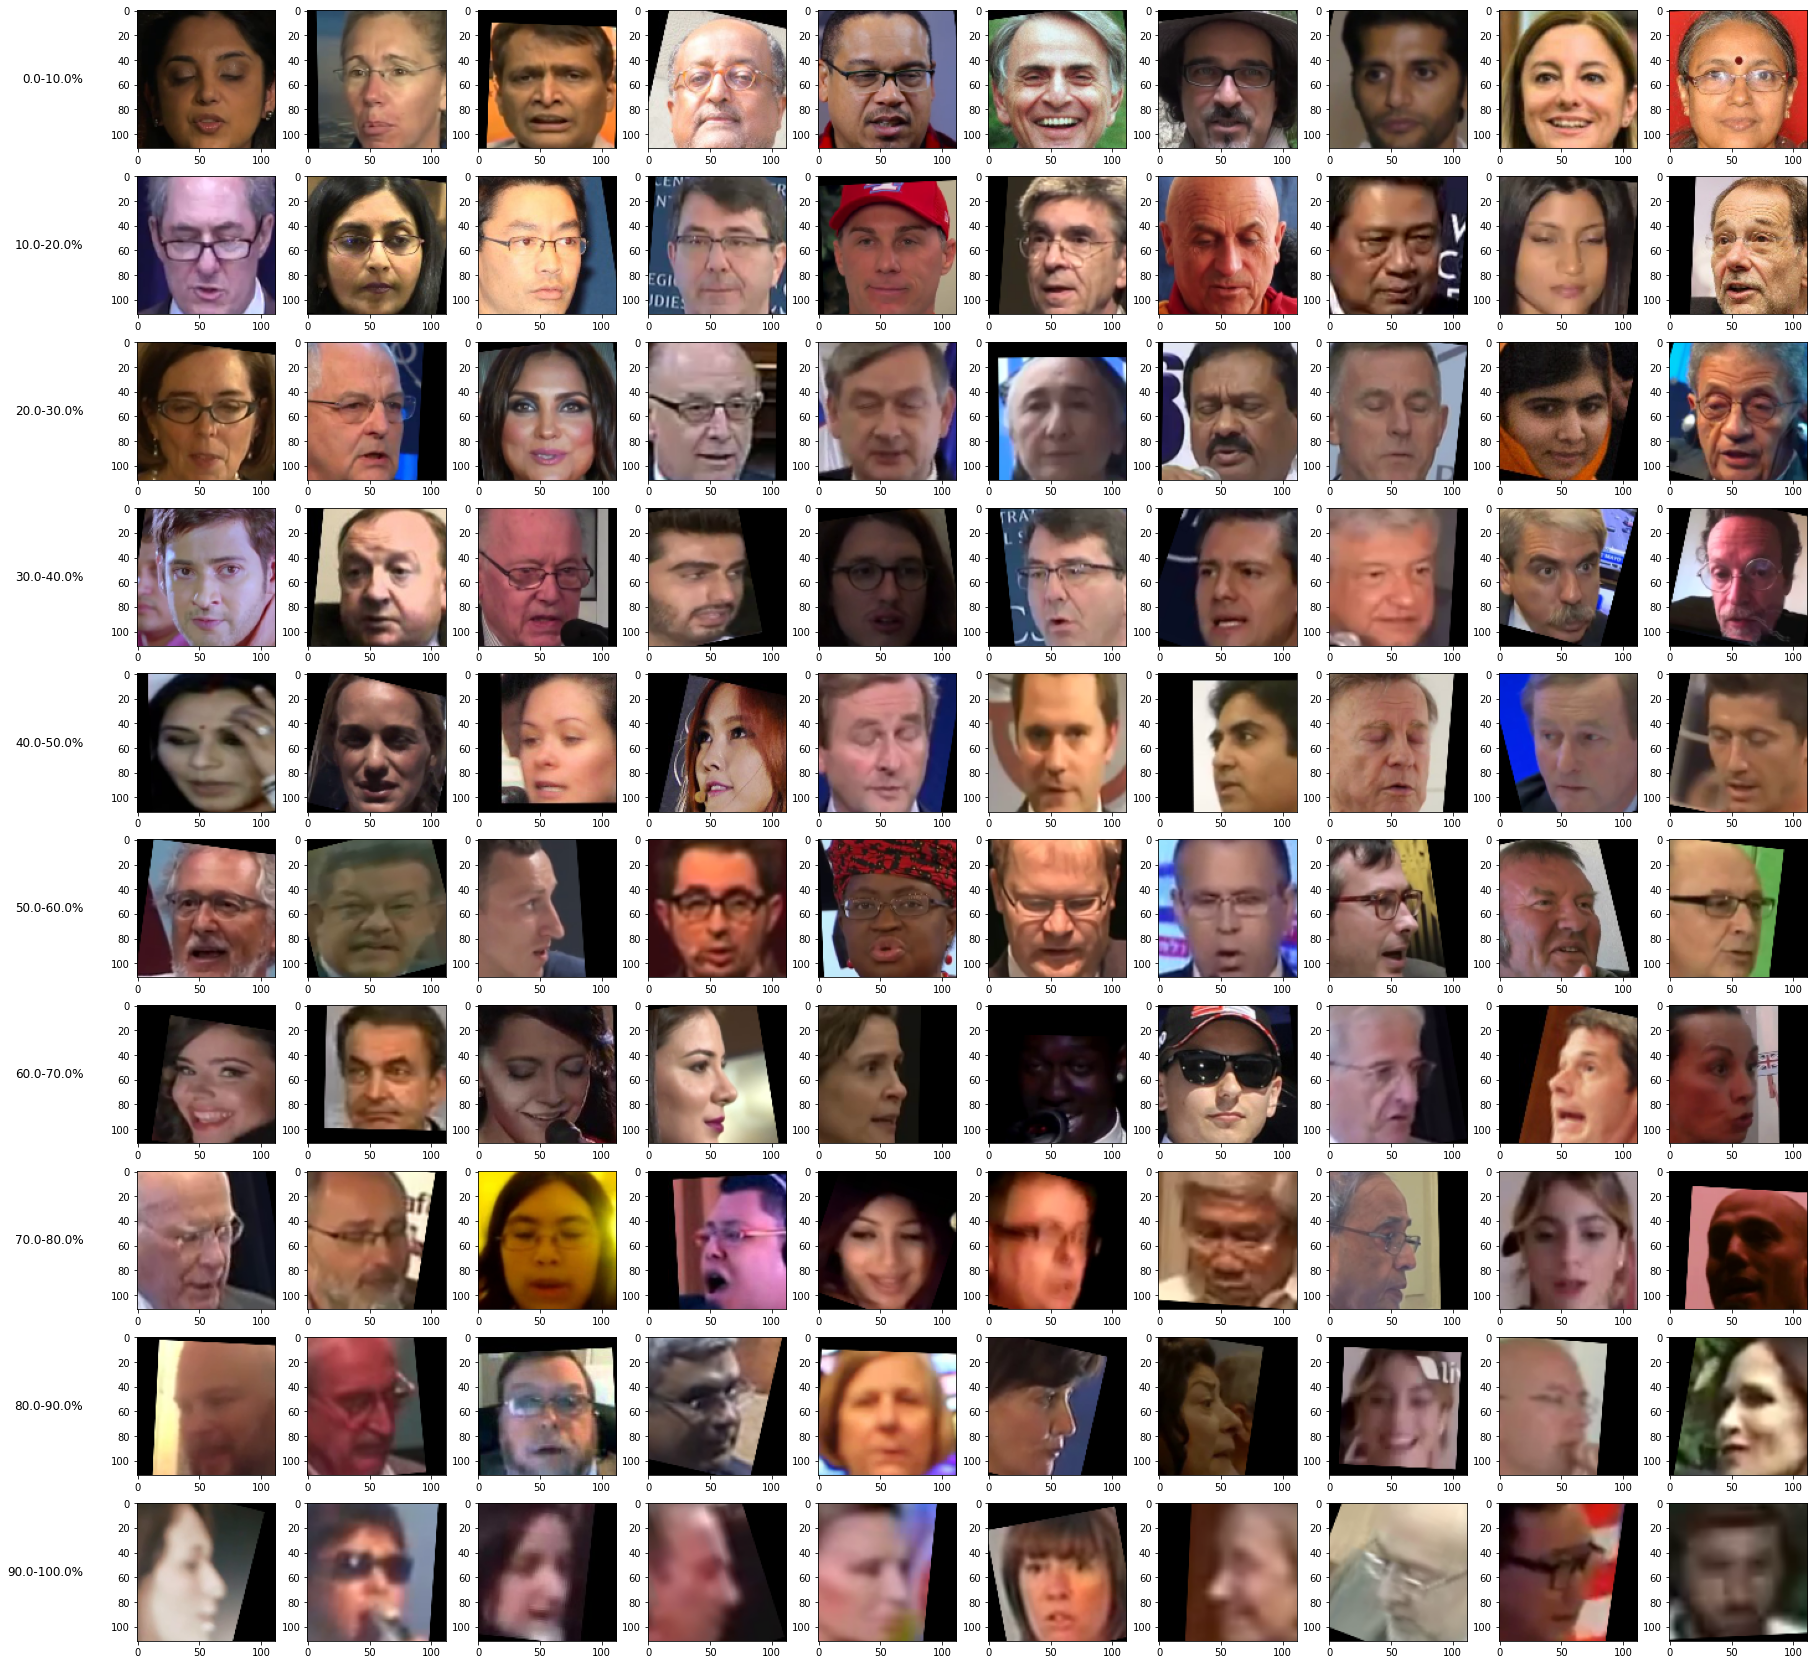

In [28]:
show_pics_quantiles(paths, n_groups=10, n_pics=10, save_path="/gpfs/data/gpfs0/r.kail/figures/face_figs/3.png")

In [29]:
for i in range(5):

SyntaxError: unexpected EOF while parsing (<ipython-input-29-aa82eeb25f1e>, line 1)